In [1]:
library(tidyverse)
library(GOSemSim)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

GOSemSim v2.12.0  For help: https://guangchuangyu.github.io/GOSemSim

If you use GOSemSim in published research, please cite:
Guangchuang Yu, Fei Li, Yide Qin, Xiaochen Bo, Yibo Wu, Shengqi Wang. GOSemSim: an R package for measuring semantic similarity among GO terms and gene products Bioinformatics 2010, 26(7):976-978


In [2]:
library(ggplot2)

In [3]:
library(org.At.tair.db)

Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply

In [4]:
make_comparison <- function(owngofolder, gprofilerfolder){
    owngo.stats <- read.csv(paste(owngofolder, "GO_contrasts_stats.csv", sep=""))
    gprofiler.stats <- read.csv(paste(gprofilerfolder, "GO_contrasts_stats.csv", sep=""))
    comparison.stats <- merge(owngo.stats, gprofiler.stats, by="name", all=TRUE) %>% 
                        dplyr::select(name, numTerms.x, numTerms.y, numGenes.y)
    names(comparison.stats) <- c('Name', 'Num.Terms.OWN', 'Num.Terms.GPROFILER', 'Num.Genes')
    return(comparison.stats)
}

In [5]:
owngofolder <- '/data/projects/julia.pratt/CS1_genomeSelection/scripts/ownGO/contrasts/'
gprofilerfolder <- '/data/projects/julia.pratt/CS1_genomeSelection/scripts/revigo/contrasts/COMPLETE/'
comparison.stats <- make_comparison(owngofolder, gprofilerfolder)

In [6]:
owngo.files <- list()
gprofiler.files <- list()

for (f in list.files(owngofolder)) {
    if (grepl('REVIGO', f)){
        owngo.files <- c(owngo.files, f)
    }
}
for (f in list.files(gprofilerfolder)) {
    if (grepl('REVIGO', f)){
        gprofiler.files <- c(gprofiler.files, f)
    }
}

In [7]:
length(intersect(unlist(gprofiler.files), unlist(owngo.files)))

[1] 27

In [8]:
owngofolder <- '/data/projects/julia.pratt/CS1_genomeSelection/scripts/ownGO/contrasts/'
gprofilerfolder <- '/data/projects/julia.pratt/CS1_genomeSelection/scripts/revigo/contrasts/COMPLETE/'
comparison.stats <- make_comparison(owngofolder, gprofilerfolder)

In [9]:
atGO.bp <- godata('org.At.tair.db', ont="BP")
atGO.cc <- godata('org.At.tair.db', ont="CC")
atGO.mf <- godata('org.At.tair.db', ont="MF")

preparing gene to GO mapping data...
preparing IC data...
preparing gene to GO mapping data...
preparing IC data...
preparing gene to GO mapping data...
preparing IC data...


In [10]:
gosemsim <- function(go1, go2, ont, rep, name){
    gosemsims <- NULL
    if (ont == "BP"){
        go1.cleaned <- go1 %>% filter (Category == "BiologicalProcess")
        go1.cleaned <- as.character(go1.cleaned$Term.ID)

        go2.cleaned <- go2 %>% filter (Category == "BiologicalProcess")
        go2.cleaned <- as.character(go2.cleaned$Term.ID)

        wang.measure <- mgoSim(go1.cleaned, go2.cleaned, semData=atGO.bp, measure="Wang")
    }
    if (ont == "CC") {
        go1.cleaned <- go1 %>% filter (Category == "CellularComponent")
        go1.cleaned <- as.character(go1.cleaned$Term.ID)

        go2.cleaned <- go2 %>% filter (Category == "CellularComponent")
        go2.cleaned <- as.character(go2.cleaned$Term.ID)

        wang.measure <- mgoSim(go1.cleaned, go2.cleaned, semData=atGO.cc, measure="Wang")
    }
    if (ont == "MF") {
        go1.cleaned <- go1 %>% filter (Category == "MolecularFunction")
        go1.cleaned <- as.character(go1.cleaned$Term.ID)

        go2.cleaned <- go2 %>% filter (Category == "MolecularFunction")
        go2.cleaned <- as.character(go2.cleaned$Term.ID)

        wang.measure <- mgoSim(go1.cleaned, go2.cleaned, semData=atGO.mf, measure="Wang")
    }

    gosemsims <- data.frame(
        "name" = name,
        "ont" = ont,g.mea
        "rep" = rep,
        "semsim.Wang" = wansure)
    return(gosemsims)
}

In [11]:
nrow(read.csv(paste(owngofolder, "REVIGO_Leaf_2018_Veraison_Ungrafted-3309C_Up.csv", sep="")))
nrow(read.csv(paste(gprofilerfolder, "REVIGO_Leaf_2018_Veraison_Ungrafted-3309C_Up.csv", sep="")))

[1] 7

[1] 8

In [19]:
head(results)

name,ont,rep,semsim.Wang
REVIGO_Leaf_2018_Anthesis_1103P-3309C_Down.csv,BP,0,0.623
REVIGO_Leaf_2018_Anthesis_1103P-3309C_Down.csv,BP,1,0.356
REVIGO_Leaf_2018_Anthesis_1103P-3309C_Down.csv,BP,2,0.440
REVIGO_Leaf_2018_Anthesis_1103P-3309C_Down.csv,BP,3,0.360
REVIGO_Leaf_2018_Anthesis_1103P-3309C_Down.csv,BP,4,0.454
REVIGO_Leaf_2018_Anthesis_1103P-3309C_Down.csv,BP,5,0.367


In [20]:
head(df)

X,Term.ID,Name,Value,Category,Original_Term
1,GO:0005515,protein binding,-1.301,MolecularFunction,GO:0005515
2,GO:0004672,protein kinase activity,-1.301,MolecularFunction,GO:0004672
3,GO:0005524,ATP binding,-1.301,MolecularFunction,GO:0005524
4,GO:0006468,protein phosphorylation,-1.301,BiologicalProcess,GO:0006468
5,GO:0003887,DNA-directed DNA polymerase activity,-1.301,MolecularFunction,GO:0003887
6,GO:0006261,DNA-dependent DNA replication,-1.301,BiologicalProcess,GO:0006261


In [23]:
nrow(owngo)
nrow(gpro)

[1] 10

[1] 25

In [12]:
df <- read.csv("convertedgotable.csv")
results <- NULL

for (filename in intersect(unlist(gprofiler.files), unlist(owngo.files))) {
    owngo <- read.csv(paste(owngofolder, filename, sep=""))
    gpro <- read.csv(paste(gprofilerfolder, filename, sep=""))
    
    for (ontology in c("BP", "CC", "MF")){
        res <- gosemsim(owngo, gpro, ont=ontology, rep="0", name=filename)
        results <- rbind(results, res)
        for (i in 1:1000){
            pickrandom <- sample_n(df, (nrow(gpro)))
            res <- gosemsim(owngo, pickrandom, ont=ontology, rep=as.character(i), name=filename)
            results <- rbind(results, res)
        }
    }
    print(filename)
    flush.console()
}

[1] "REVIGO_Leaf_2018_Anthesis_1103P-3309C_Down.csv"
[1] "REVIGO_Leaf_2018_Anthesis_1103P-3309C_Up.csv"
[1] "REVIGO_Leaf_2018_Anthesis_1103P-SO4_Down.csv"
[1] "REVIGO_Leaf_2018_Anthesis_3309C-SO4_Down.csv"
[1] "REVIGO_Leaf_2018_Anthesis_Ungrafted-1103P_Up.csv"
[1] "REVIGO_Leaf_2018_Anthesis_Ungrafted-3309C_Down.csv"
[1] "REVIGO_Leaf_2018_Anthesis_Ungrafted-3309C_Up.csv"
[1] "REVIGO_Leaf_2018_Anthesis_Ungrafted-SO4_Down.csv"
[1] "REVIGO_Leaf_2018_Anthesis_Ungrafted-SO4_Up.csv"
[1] "REVIGO_Leaf_2018_Harvest_1103P-3309C_Down.csv"
[1] "REVIGO_Leaf_2018_Harvest_1103P-3309C_Up.csv"
[1] "REVIGO_Leaf_2018_Harvest_3309C-SO4_Down.csv"
[1] "REVIGO_Leaf_2018_Harvest_3309C-SO4_Up.csv"
[1] "REVIGO_Leaf_2018_Harvest_Ungrafted-1103P_Down.csv"
[1] "REVIGO_Leaf_2018_Harvest_Ungrafted-1103P_Up.csv"
[1] "REVIGO_Leaf_2018_Harvest_Ungrafted-3309C_Down.csv"
[1] "REVIGO_Leaf_2018_Harvest_Ungrafted-3309C_Up.csv"
[1] "REVIGO_Leaf_2018_Harvest_Ungrafted-SO4_Down.csv"
[1] "REVIGO_Leaf_2018_Harvest_Ungrafted-SO4_U

In [17]:
write.csv(results, "null_distribution_results2.csv")

Warning message:
"Removed 98 rows containing non-finite values (stat_density)."

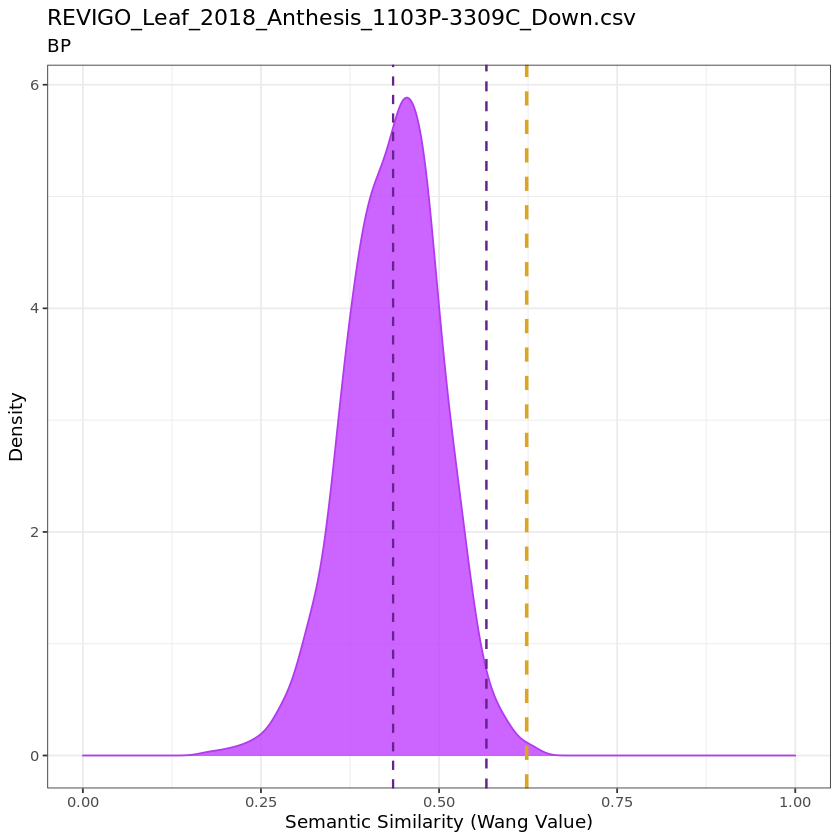

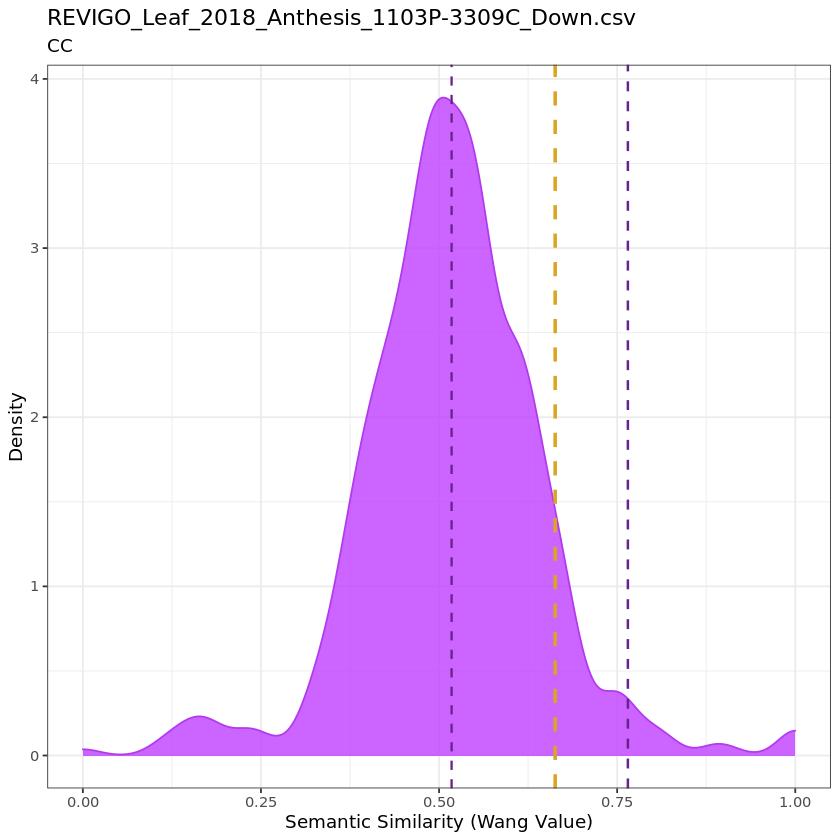

Warning message:
"Removed 72 rows containing non-finite values (stat_density)."

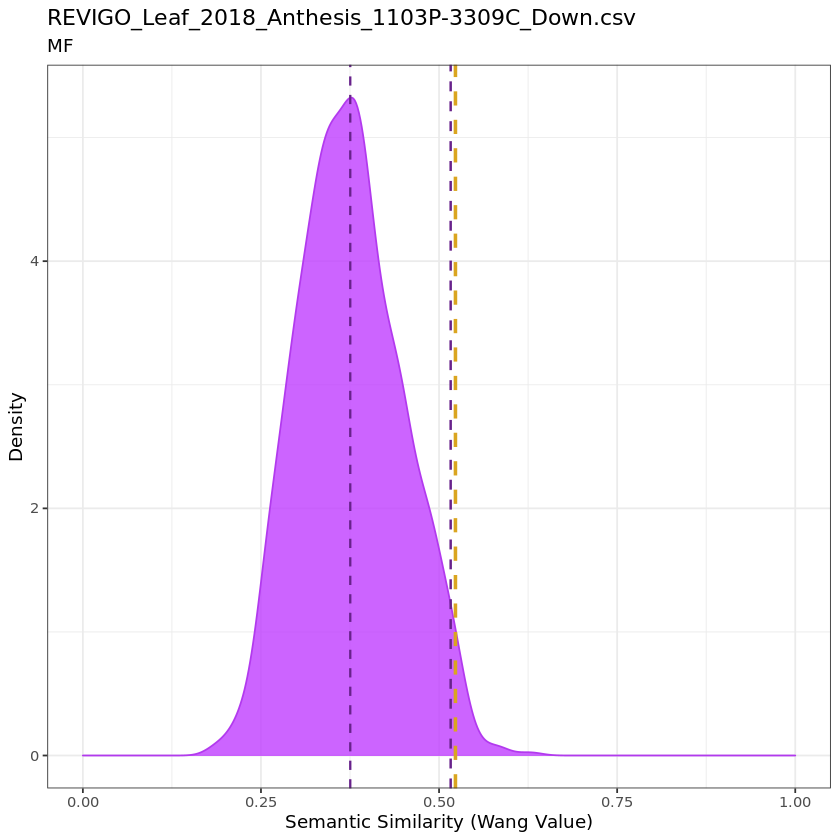

Warning message:
"Removed 456 rows containing non-finite values (stat_density)."

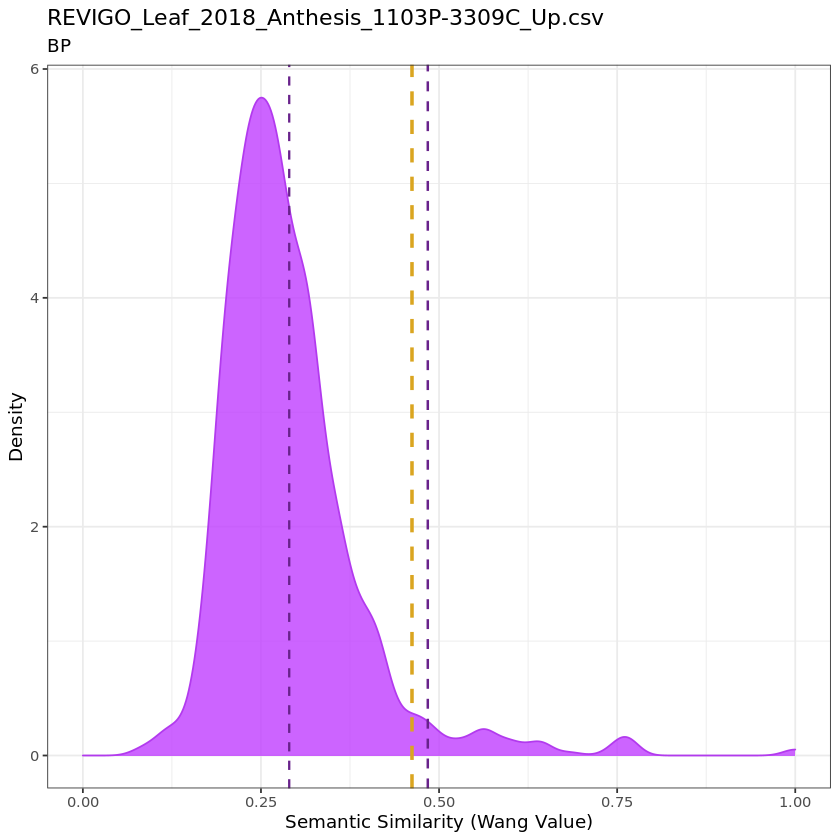

Warning message:
"Removed 17 rows containing non-finite values (stat_density)."

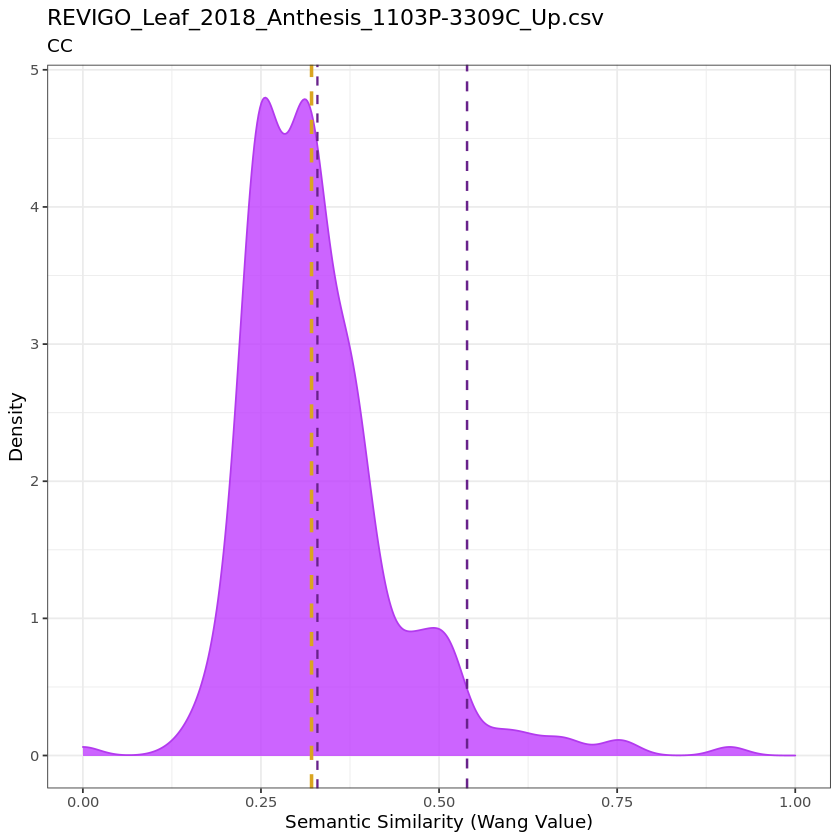

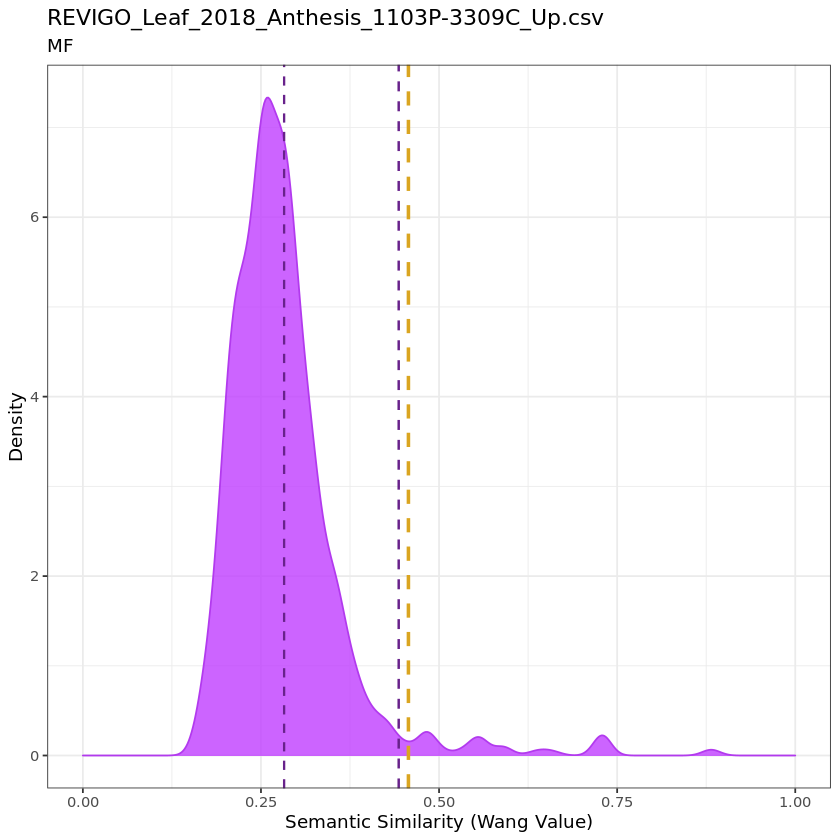

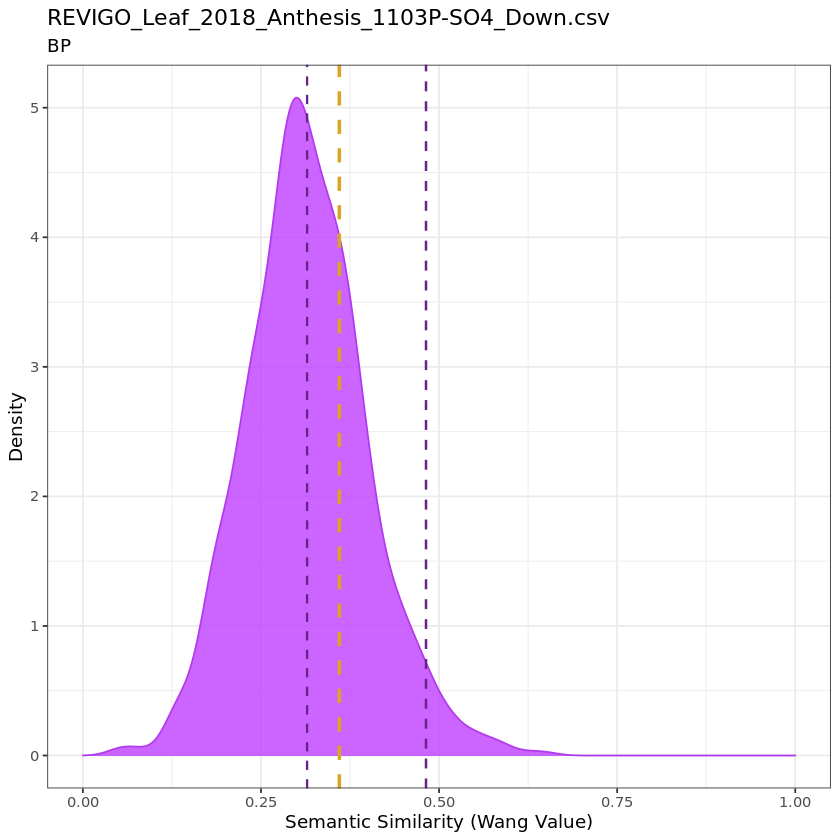

Warning message:
"Removed 92 rows containing non-finite values (stat_density)."

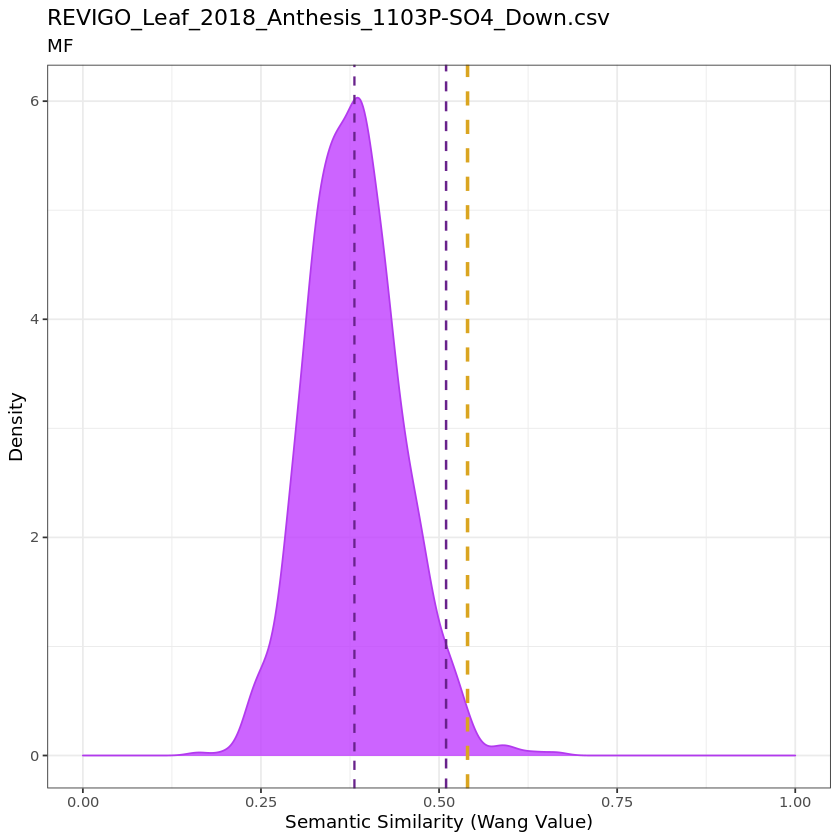

Warning message:
"Removed 579 rows containing non-finite values (stat_density)."

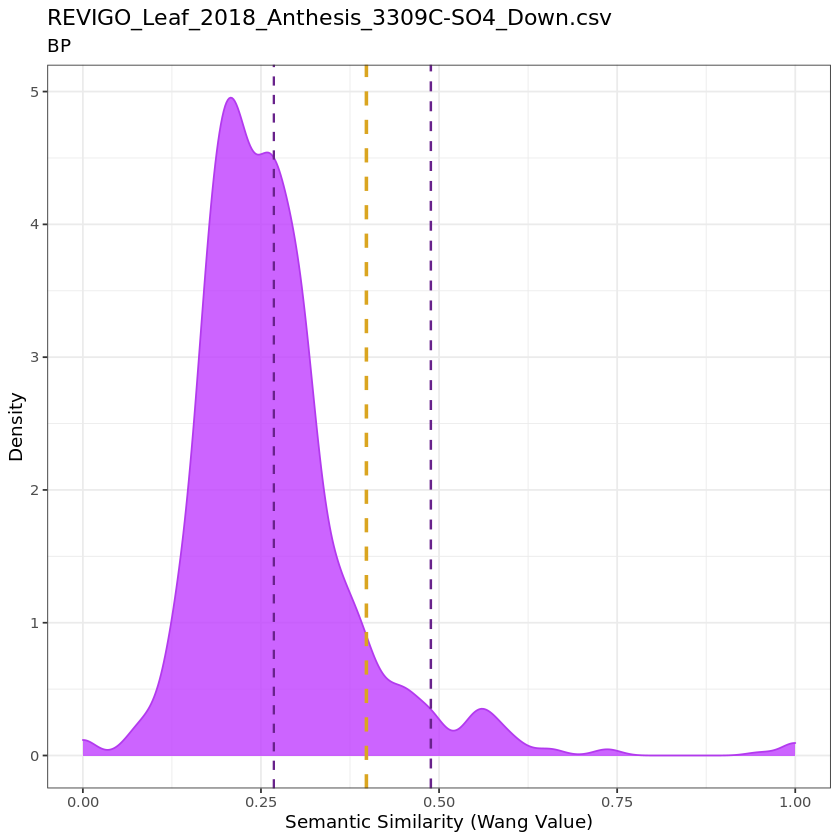

Warning message:
"Removed 507 rows containing non-finite values (stat_density)."

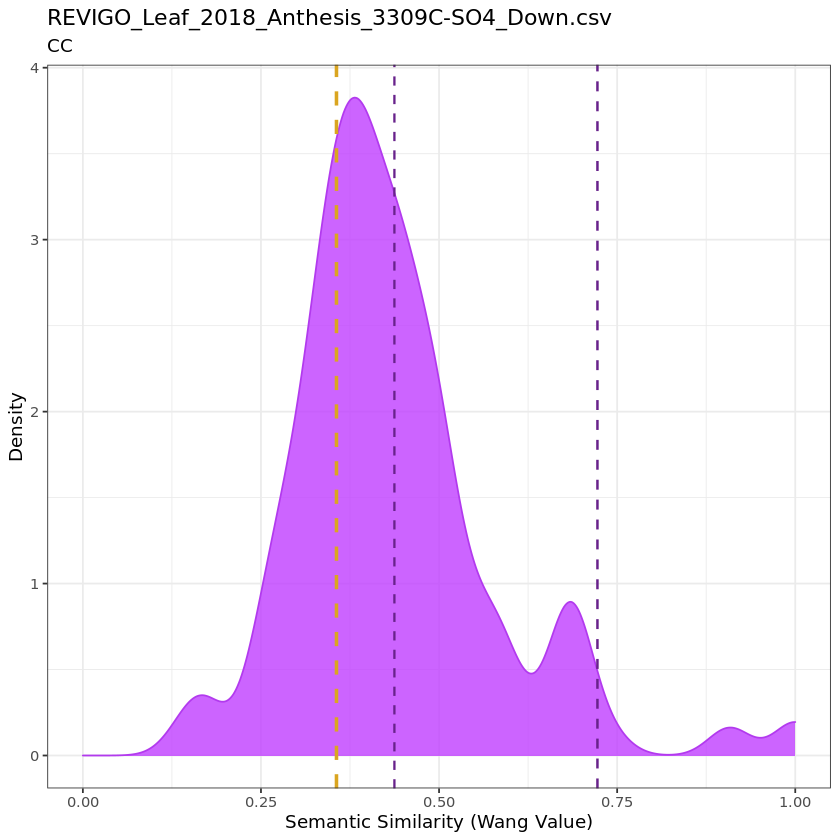

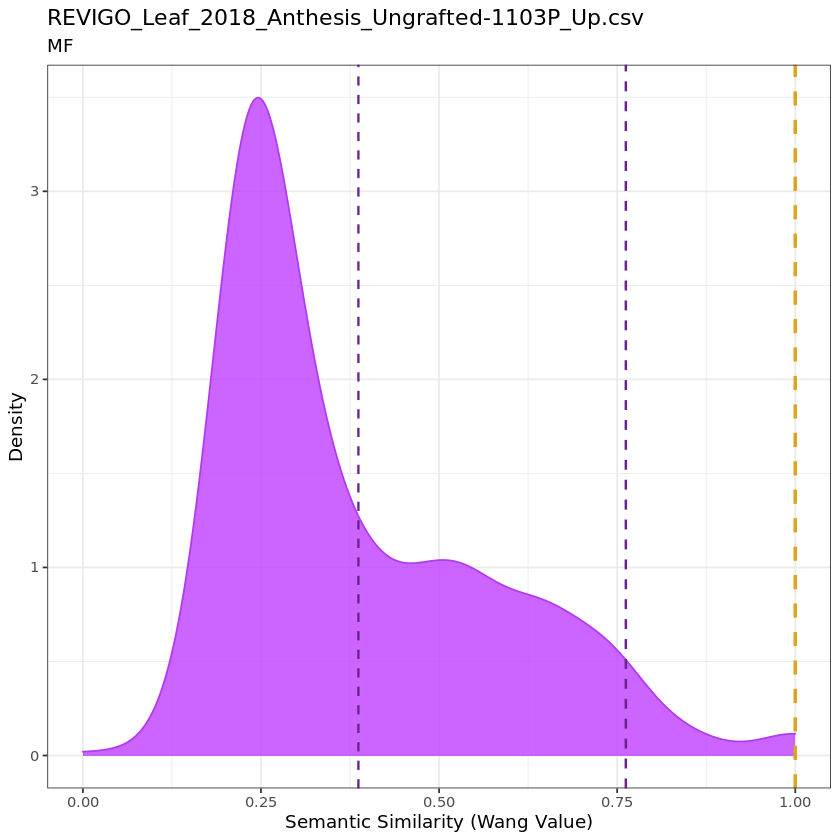

Warning message:
"Removed 29 rows containing non-finite values (stat_density)."

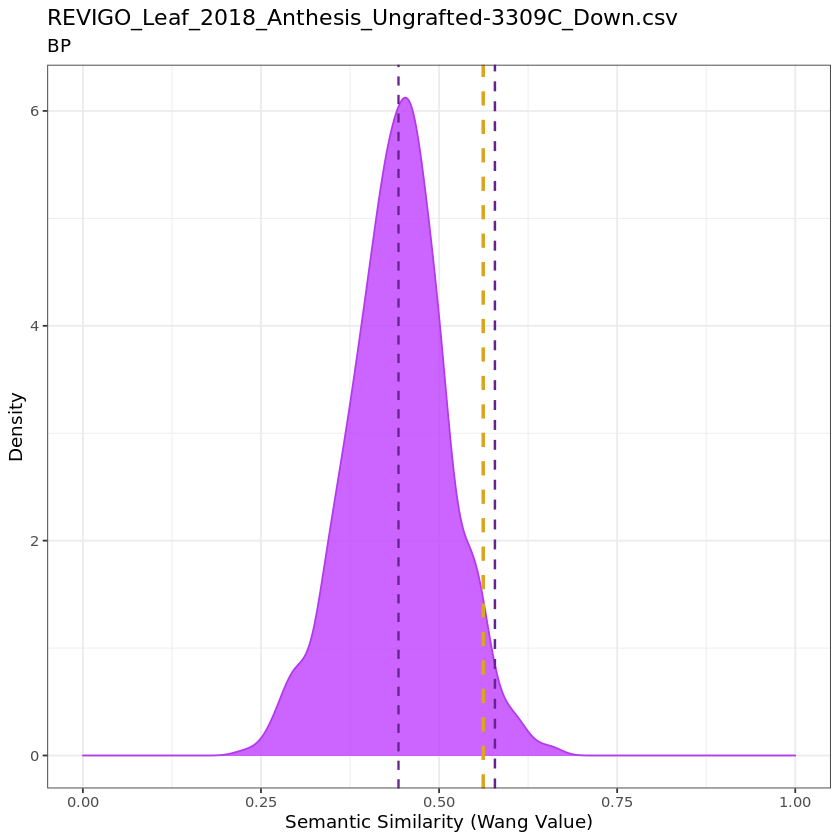

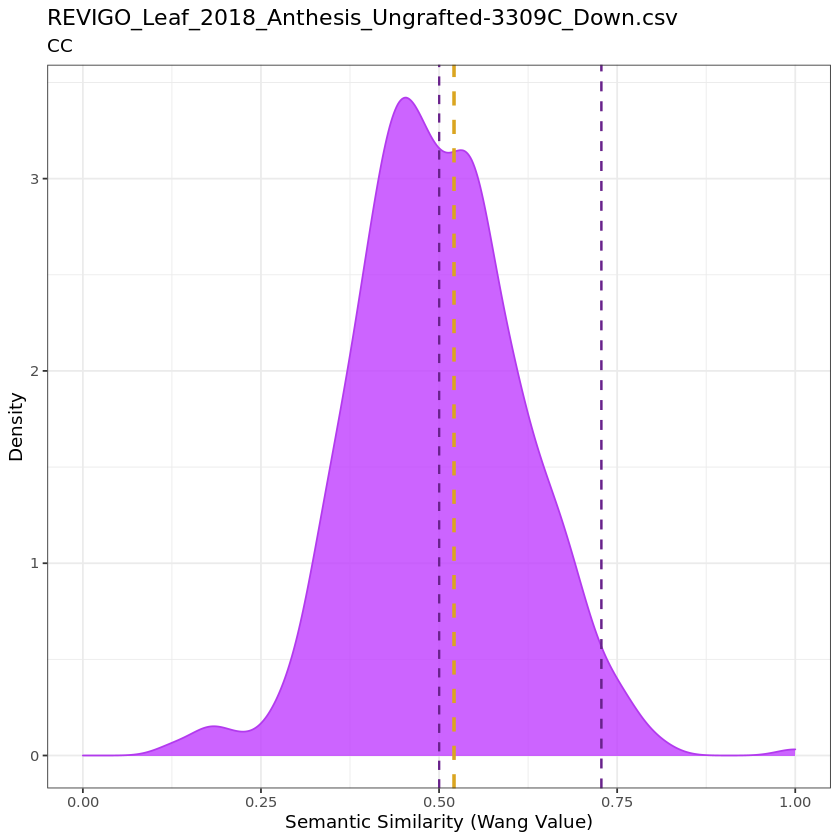

Warning message:
"Removed 379 rows containing non-finite values (stat_density)."

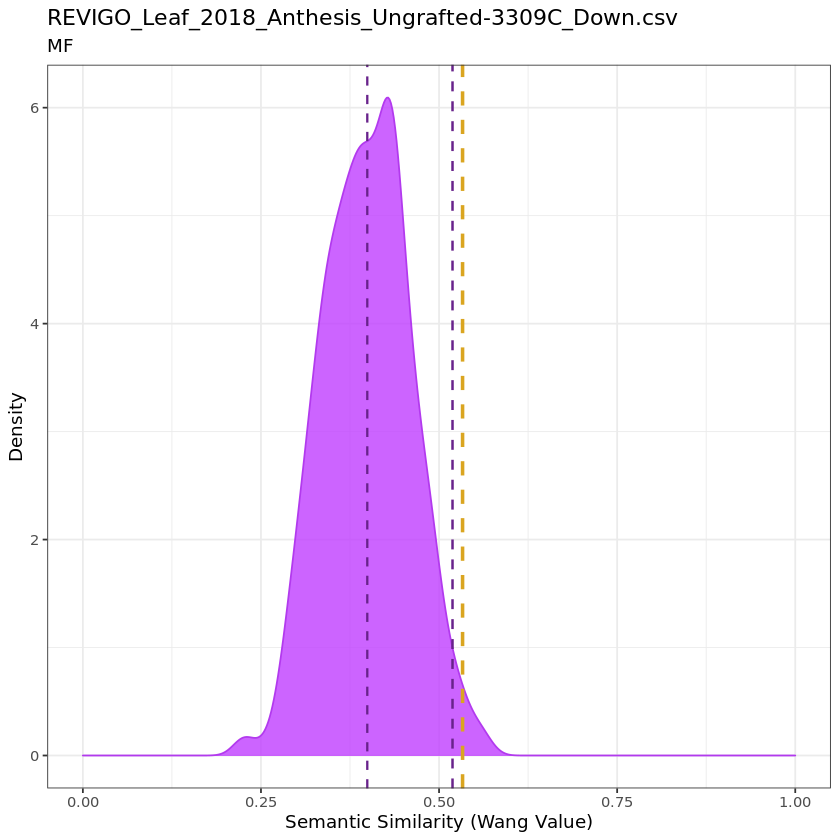

Warning message:
"Removed 253 rows containing non-finite values (stat_density)."

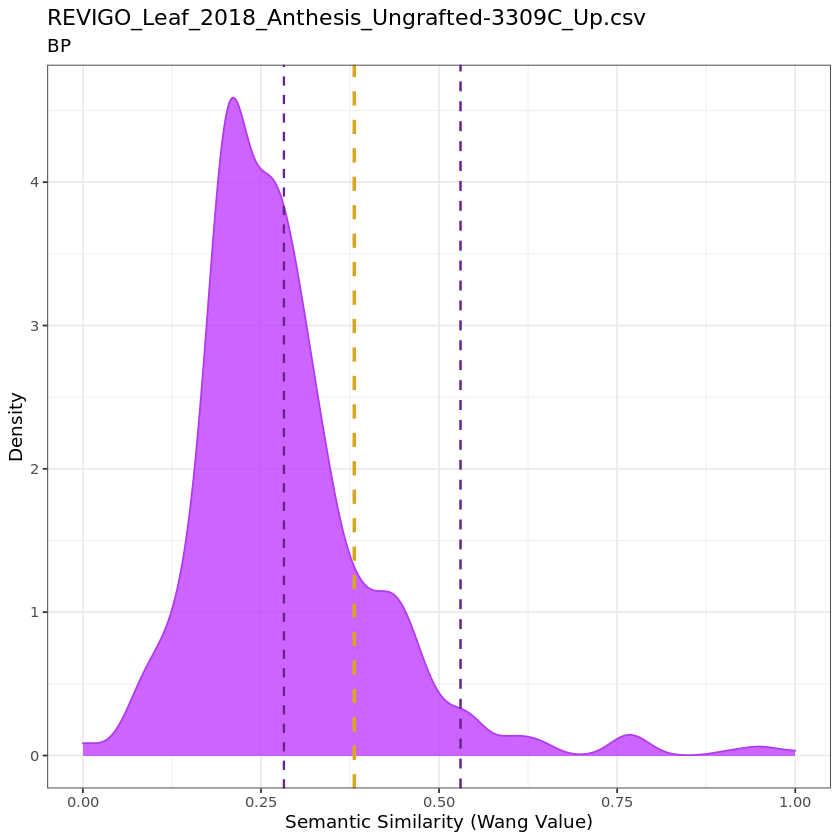

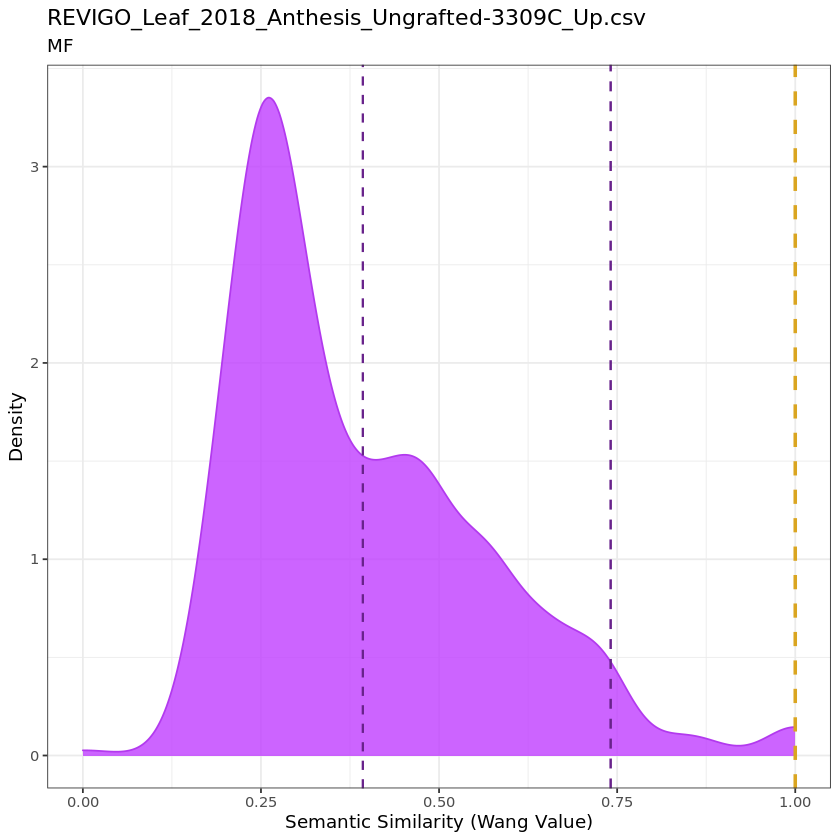

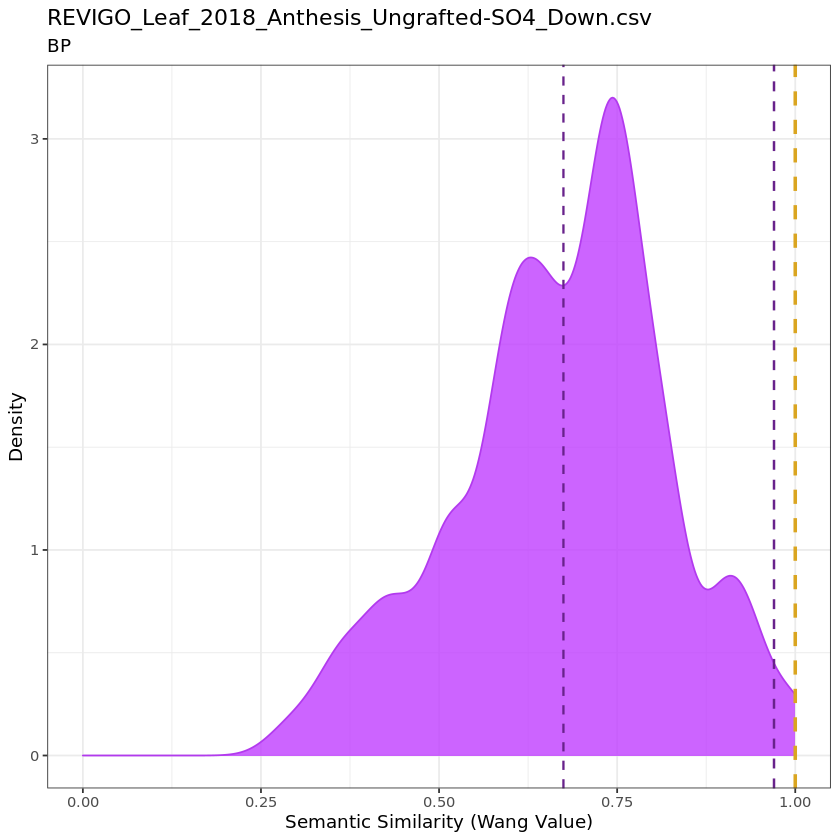

Warning message:
"Removed 8 rows containing non-finite values (stat_density)."

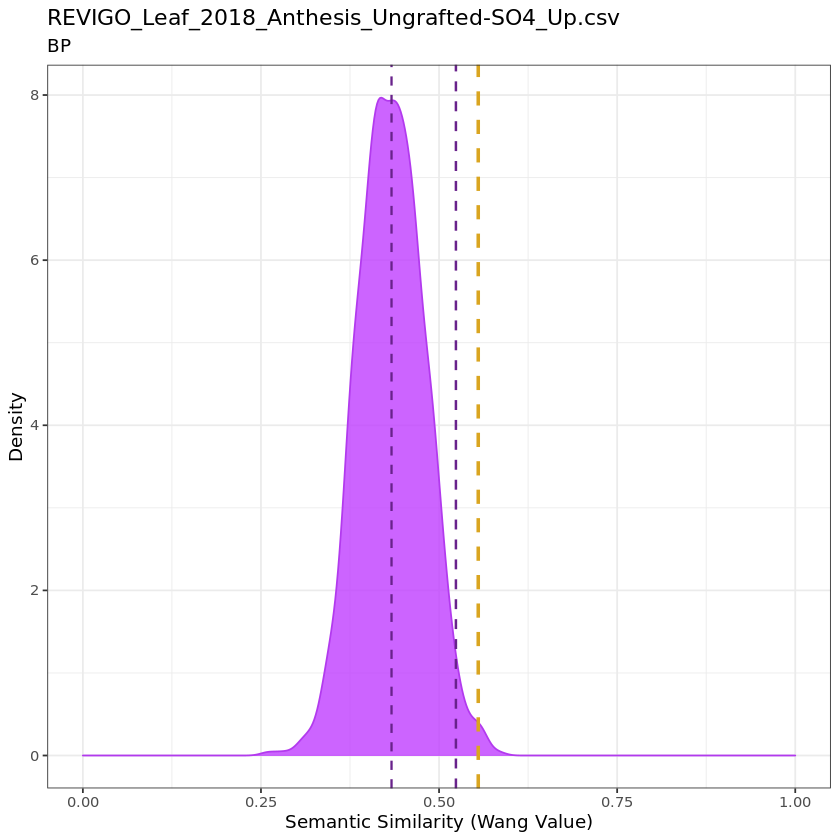

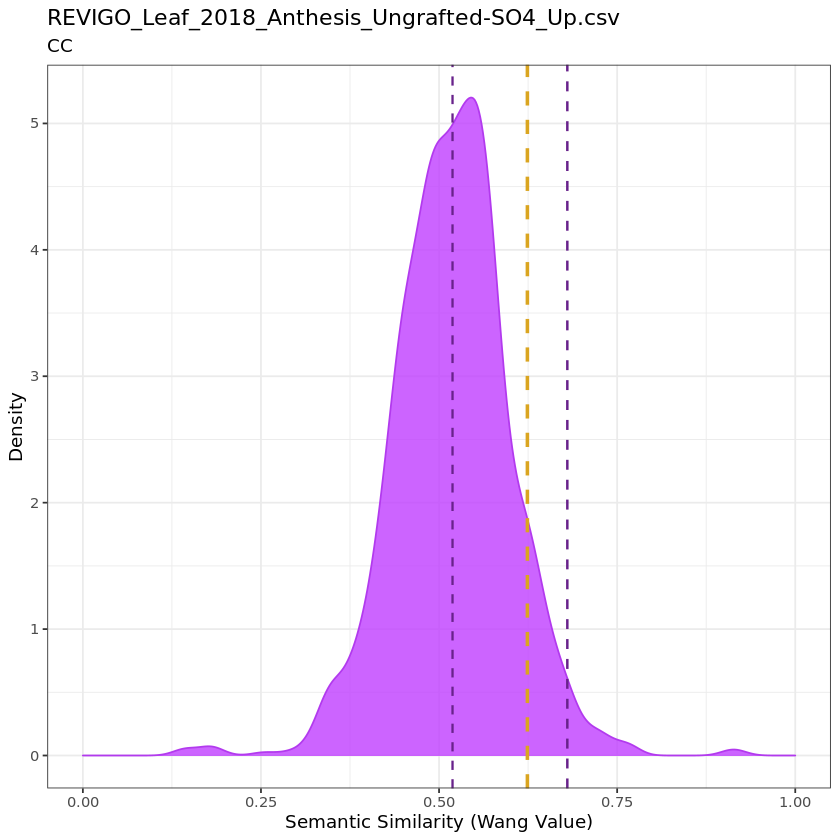

Warning message:
"Removed 889 rows containing non-finite values (stat_density)."

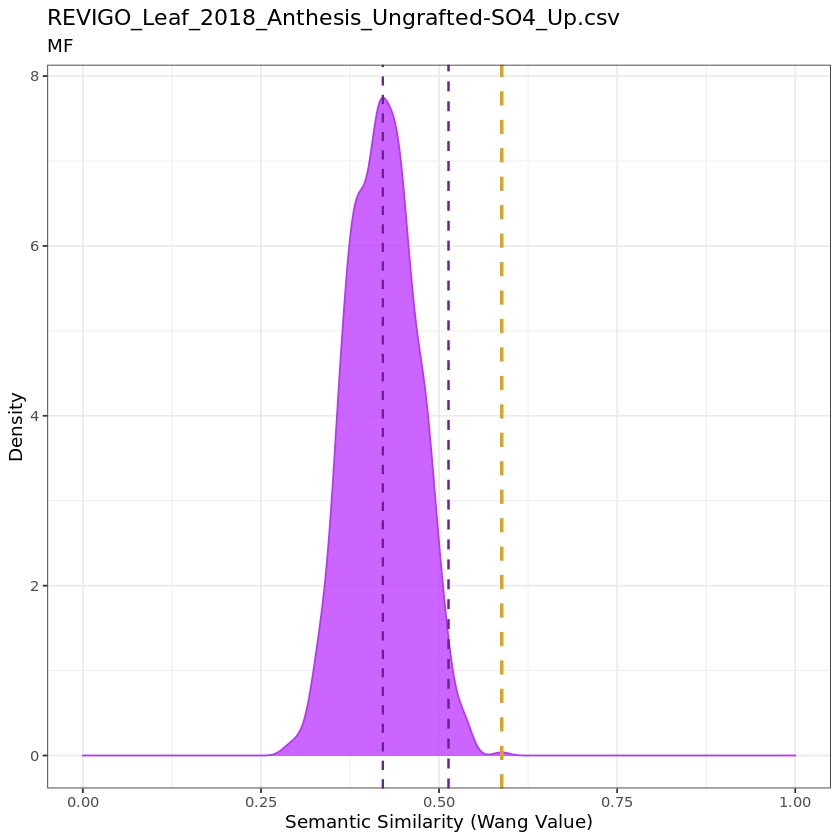

Warning message:
"Removed 643 rows containing non-finite values (stat_density)."

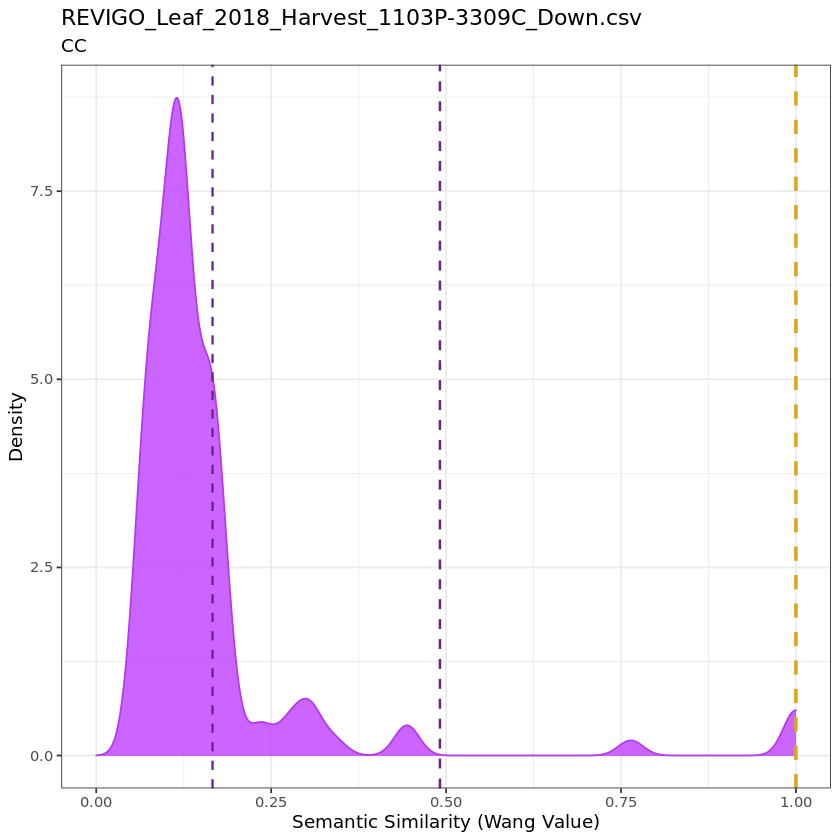

Warning message:
"Removed 601 rows containing non-finite values (stat_density)."

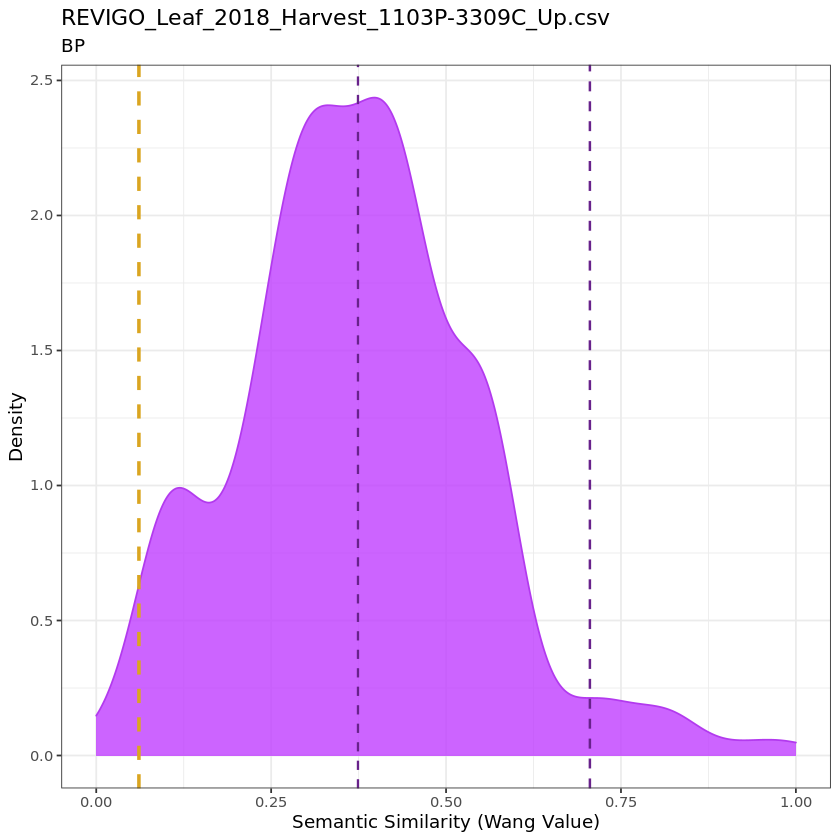

Warning message:
"Removed 2 rows containing non-finite values (stat_density)."

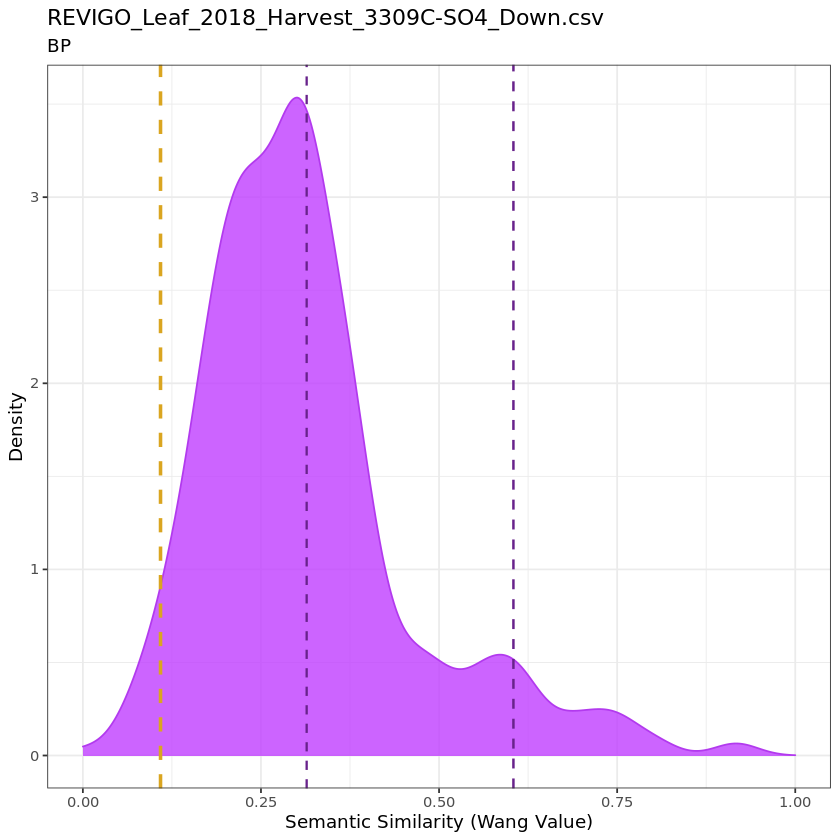

Warning message:
"Removed 133 rows containing non-finite values (stat_density)."

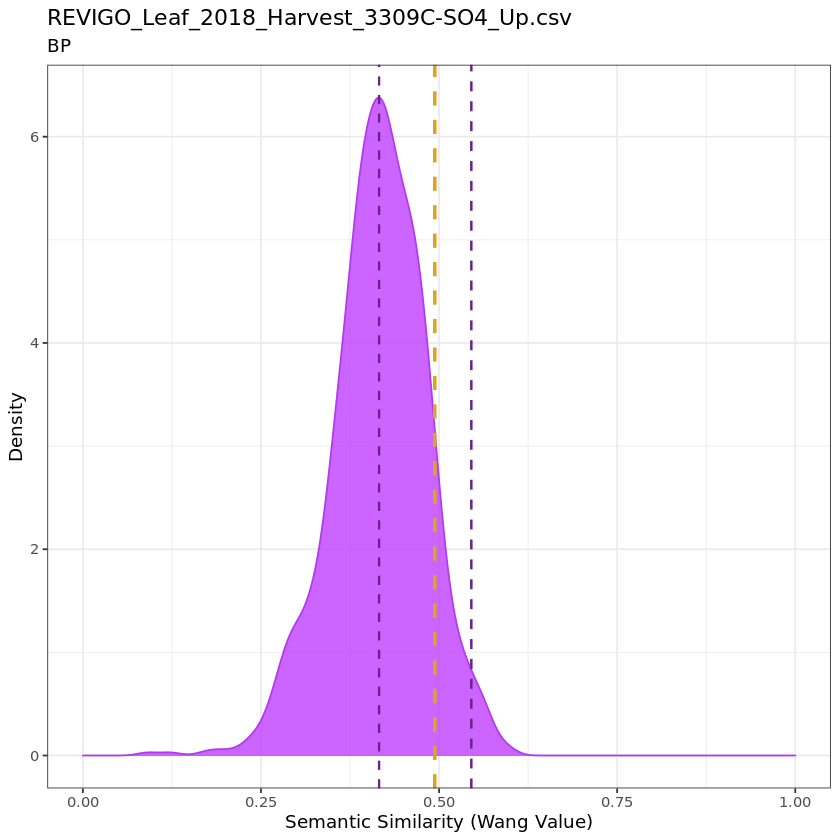

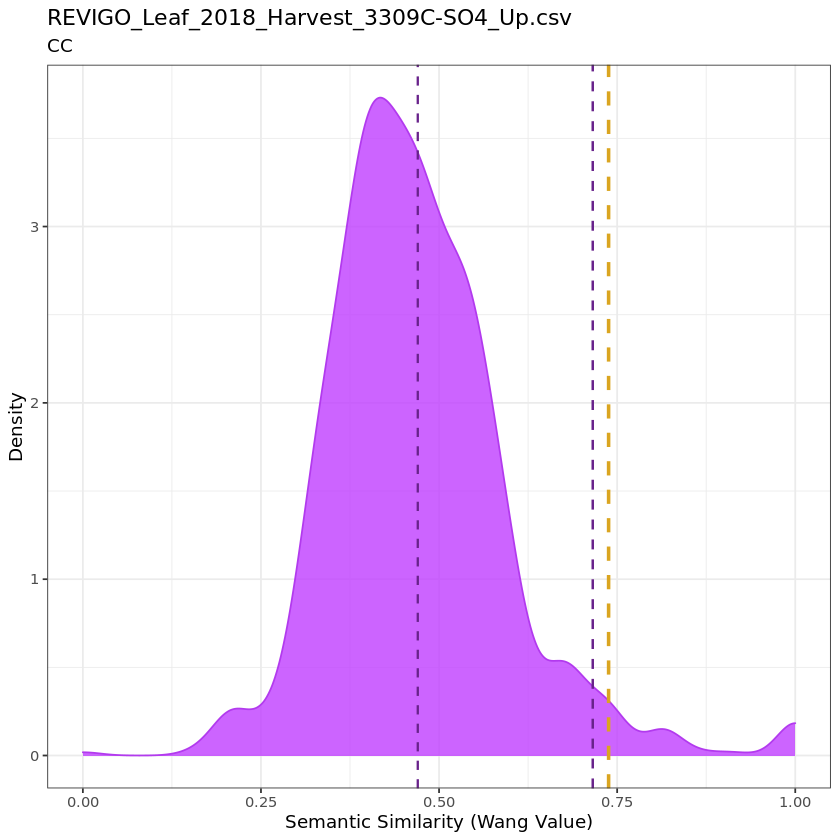

Warning message:
"Removed 481 rows containing non-finite values (stat_density)."

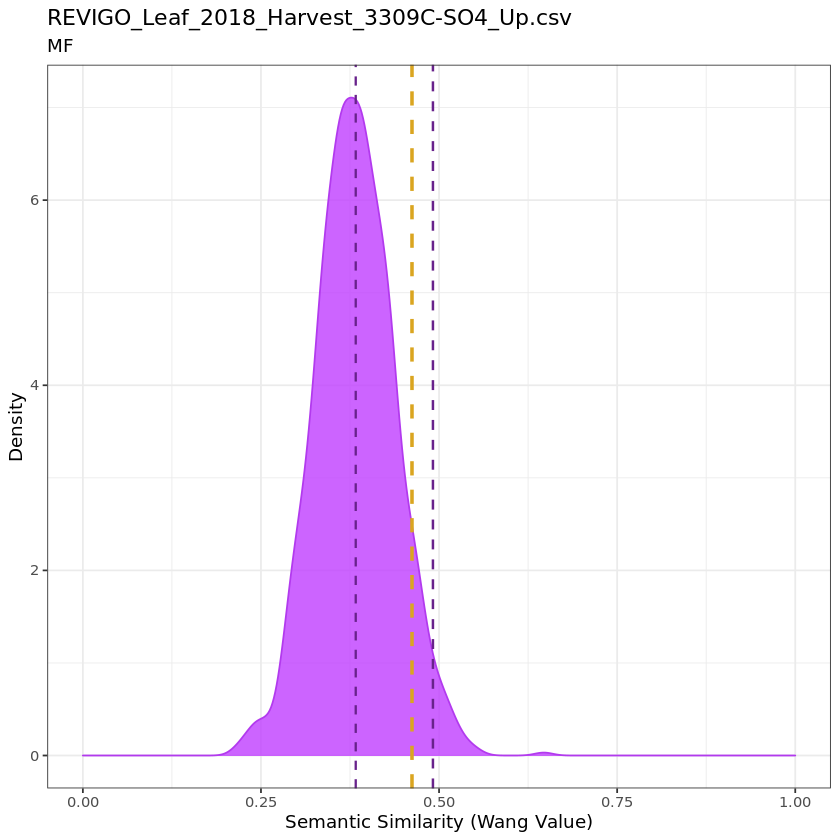

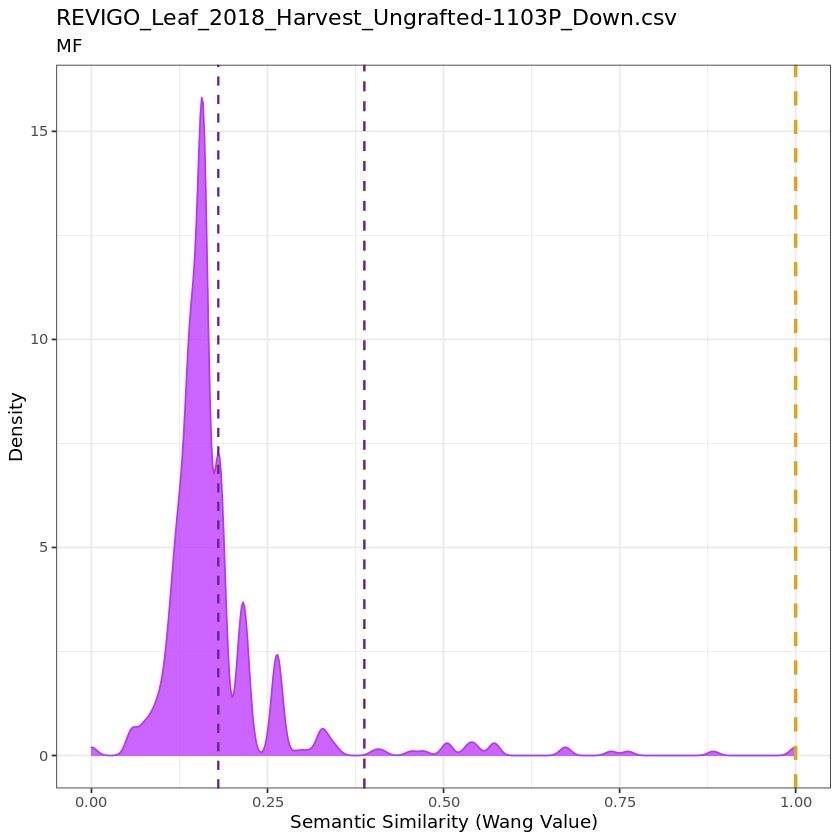

Warning message:
"Removed 5 rows containing non-finite values (stat_density)."

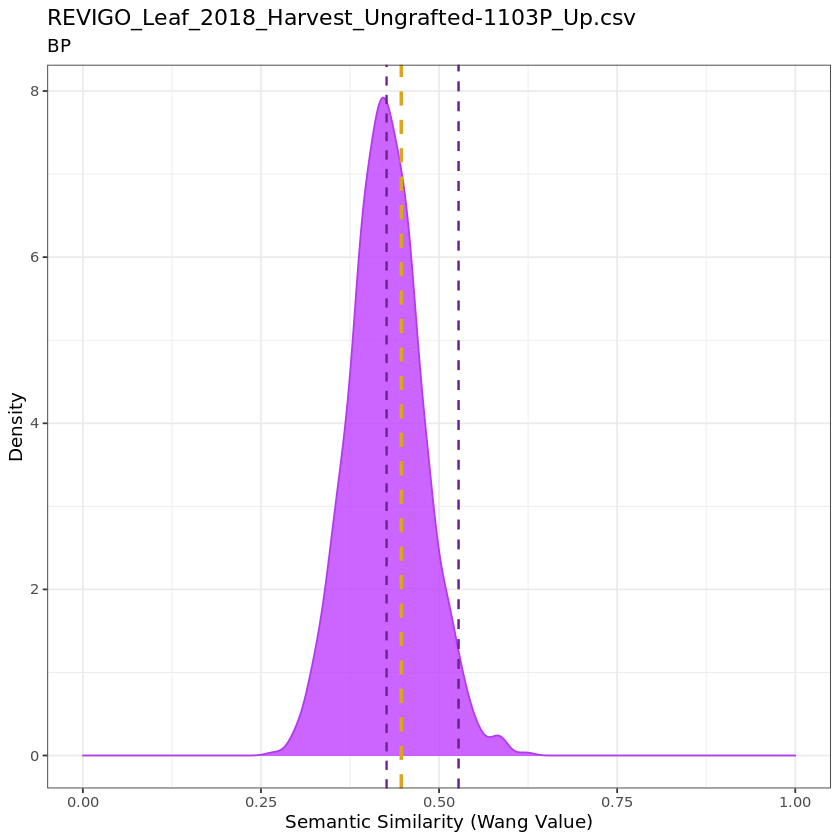

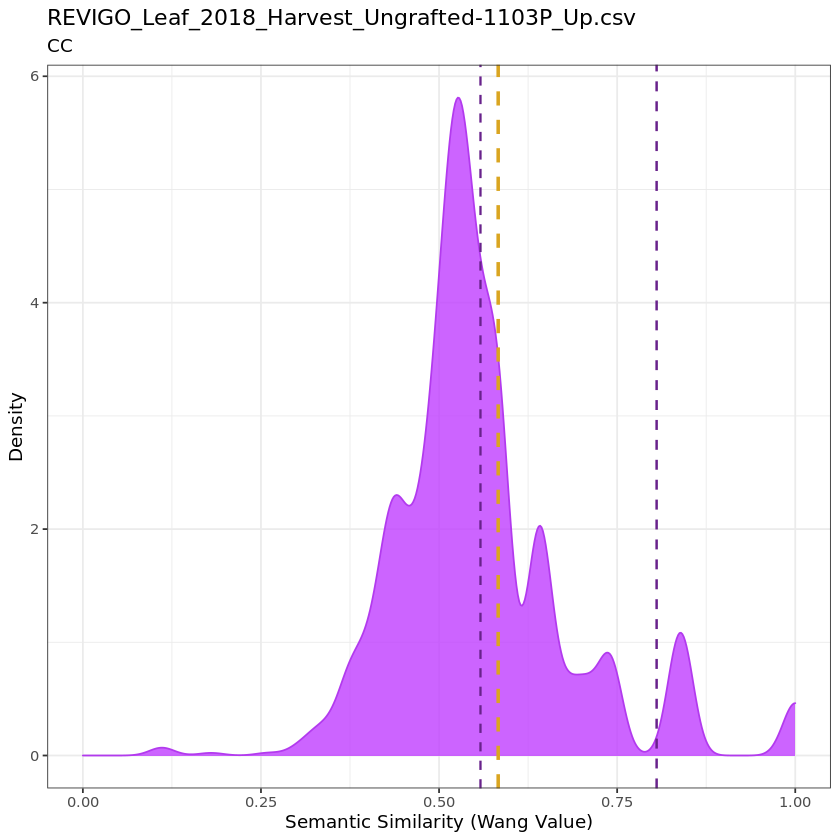

Warning message:
"Removed 142 rows containing non-finite values (stat_density)."

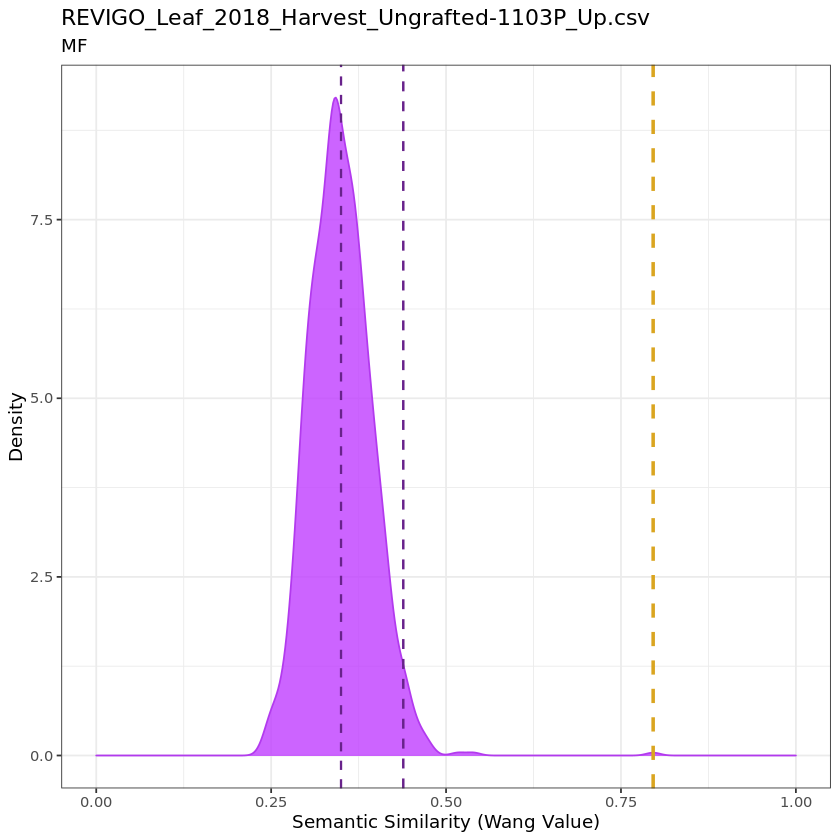

Warning message:
"Removed 63 rows containing non-finite values (stat_density)."

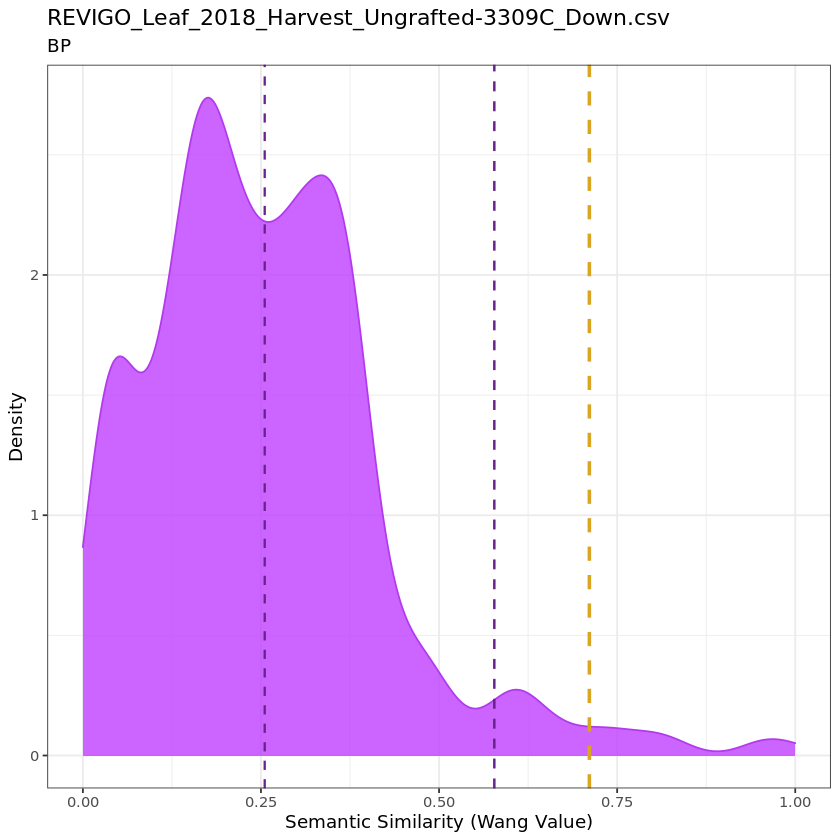

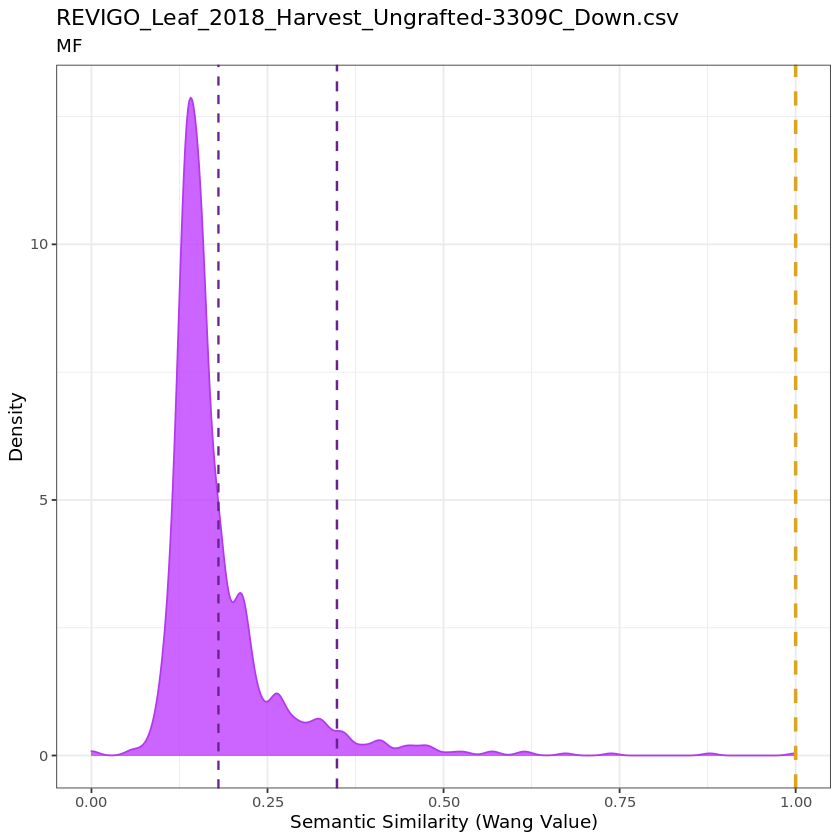

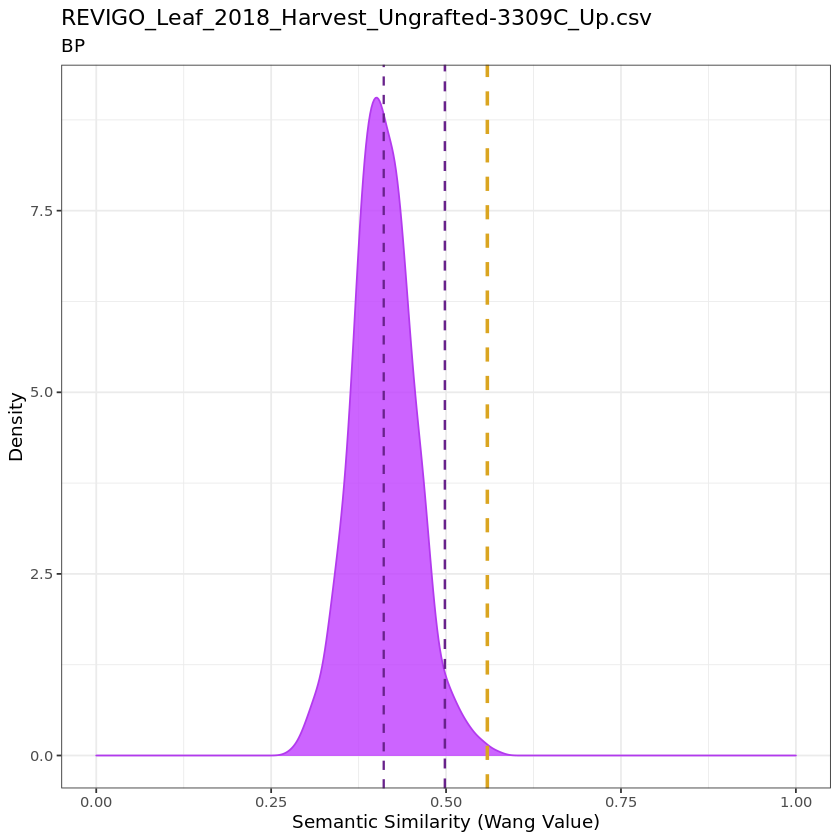

Warning message:
"Removed 621 rows containing non-finite values (stat_density)."

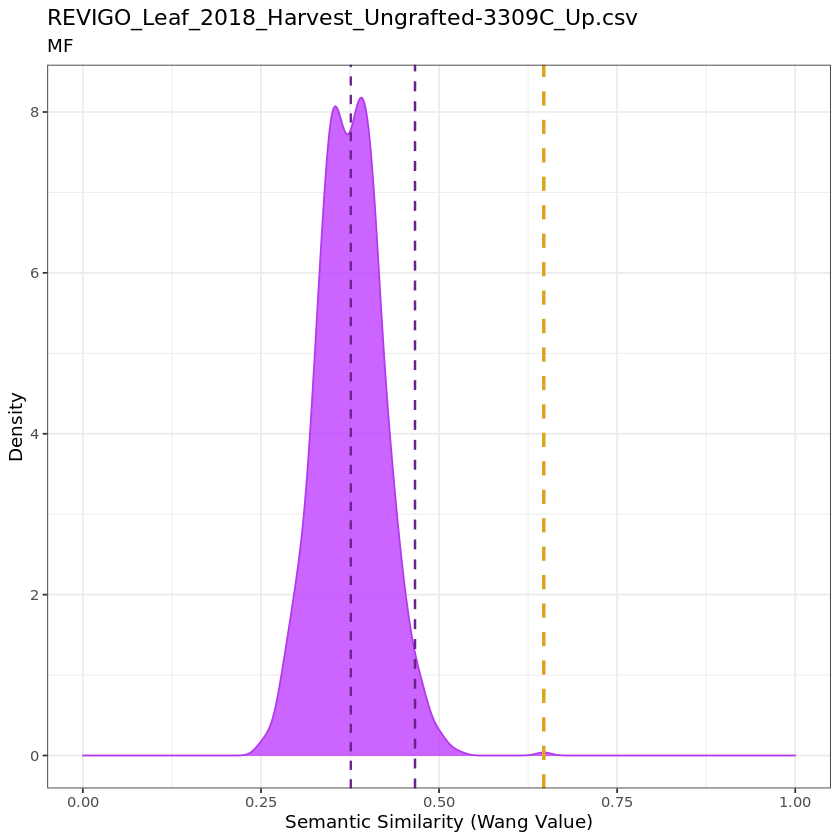

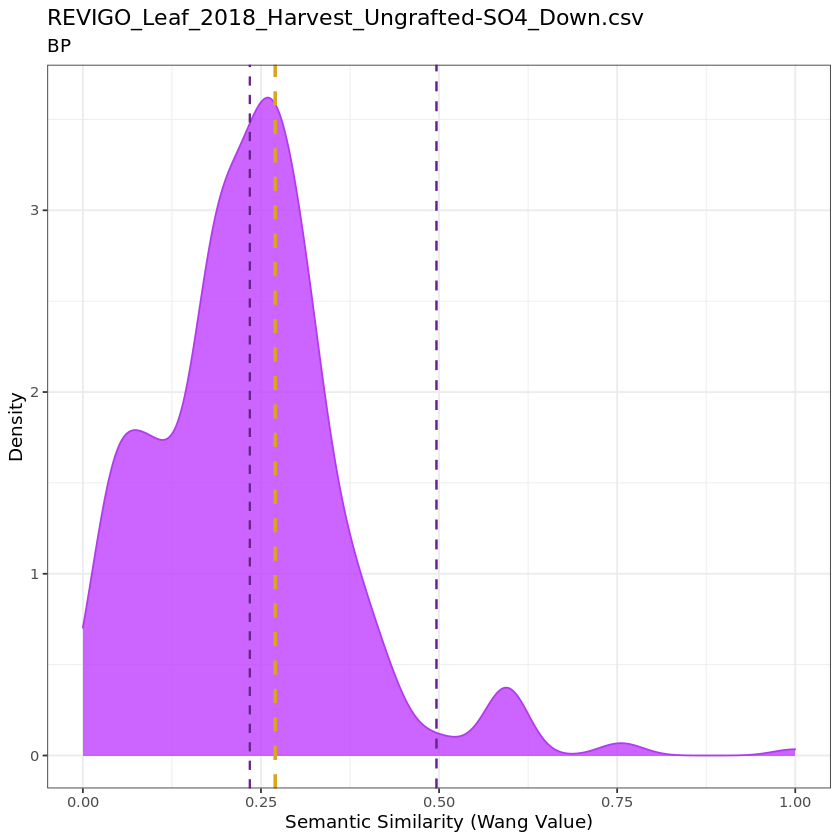

Warning message:
"Removed 1 rows containing non-finite values (stat_density)."

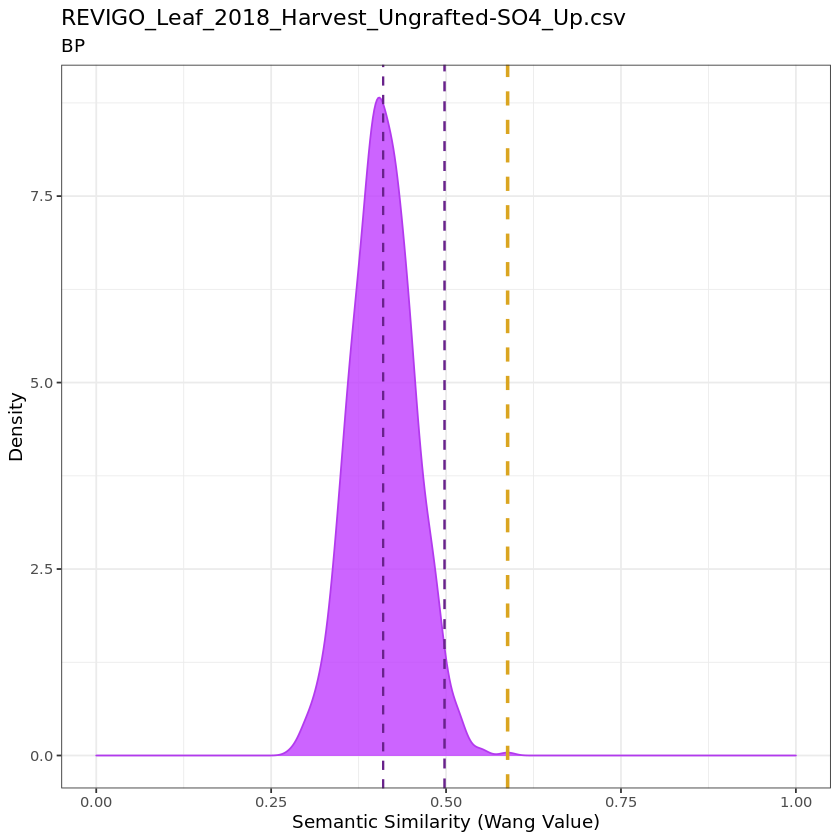

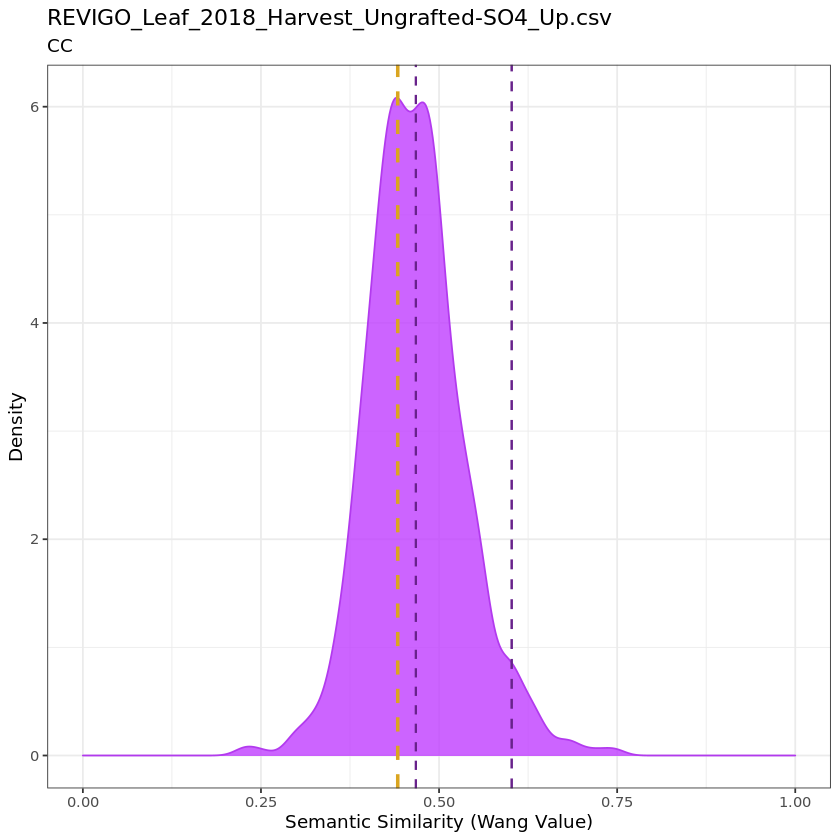

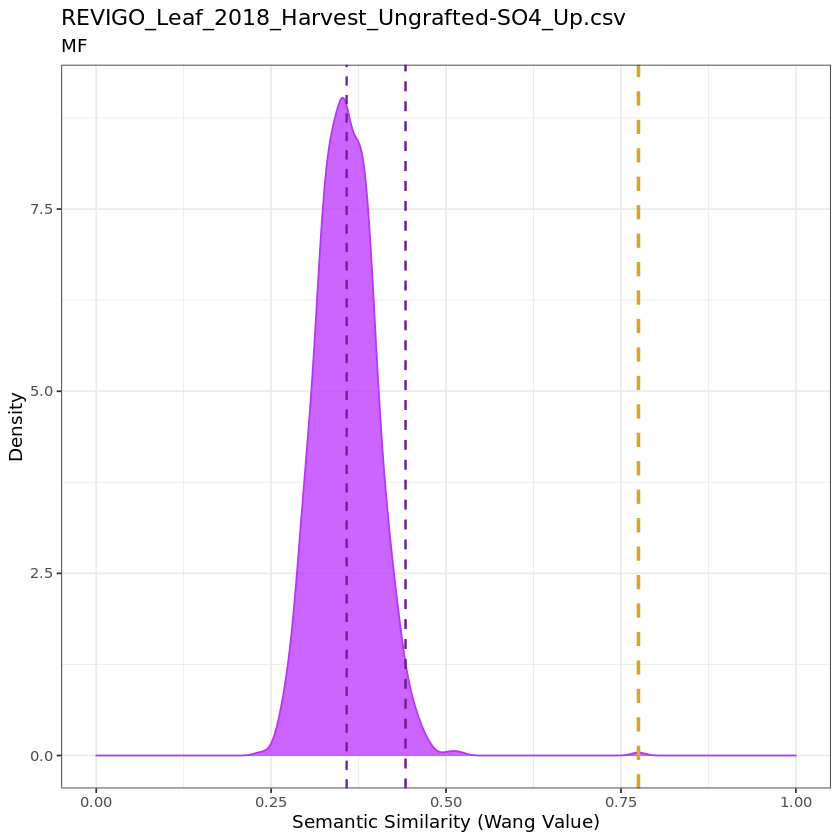

Warning message:
"Removed 2 rows containing non-finite values (stat_density)."

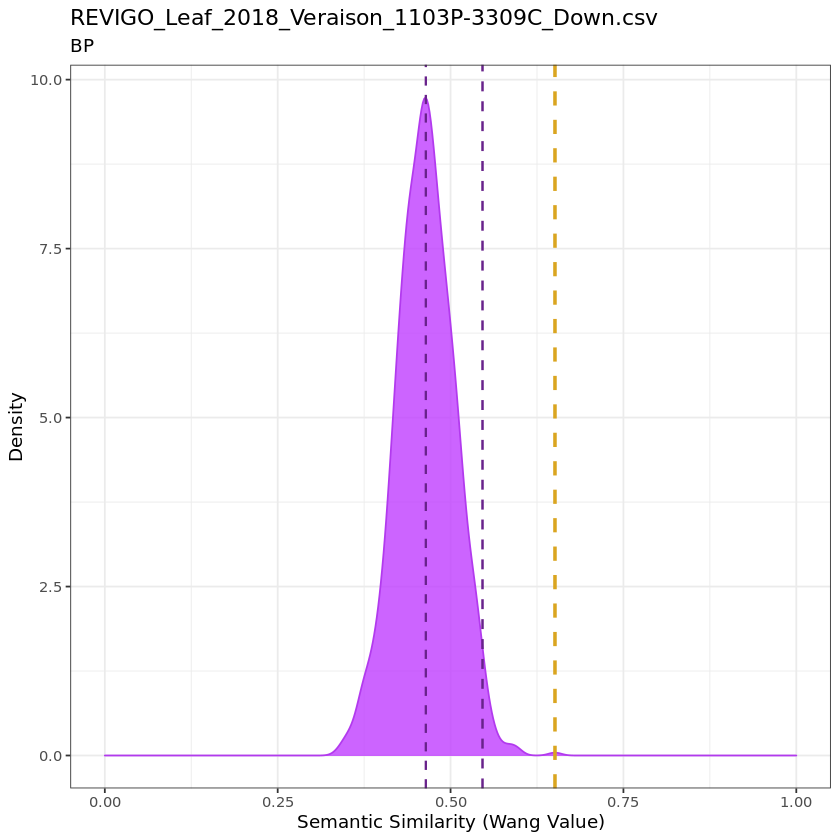

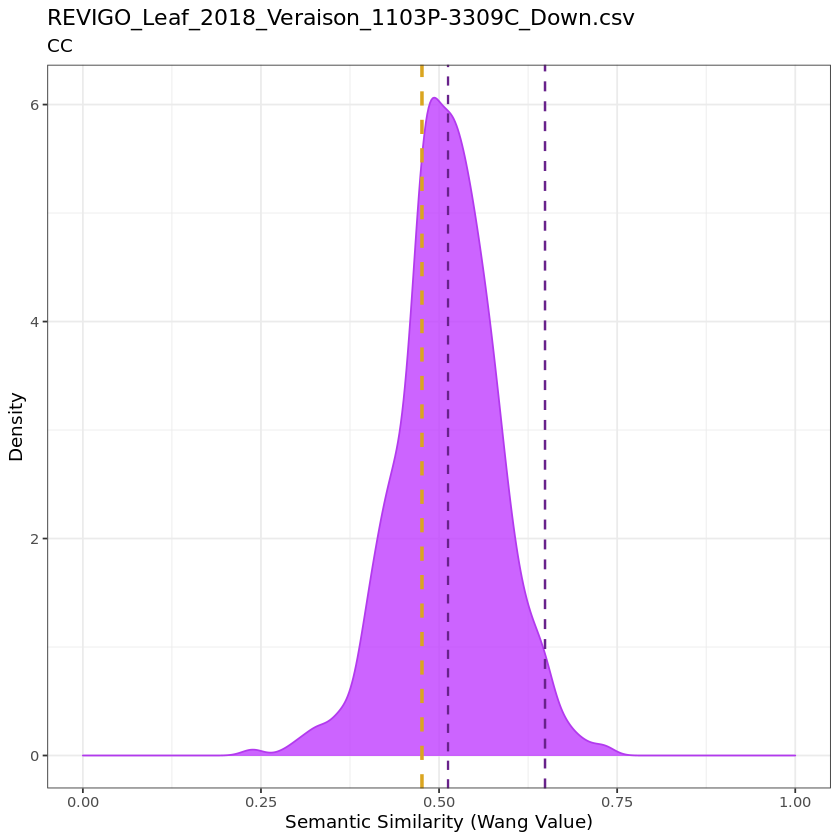

Warning message:
"Removed 9 rows containing non-finite values (stat_density)."

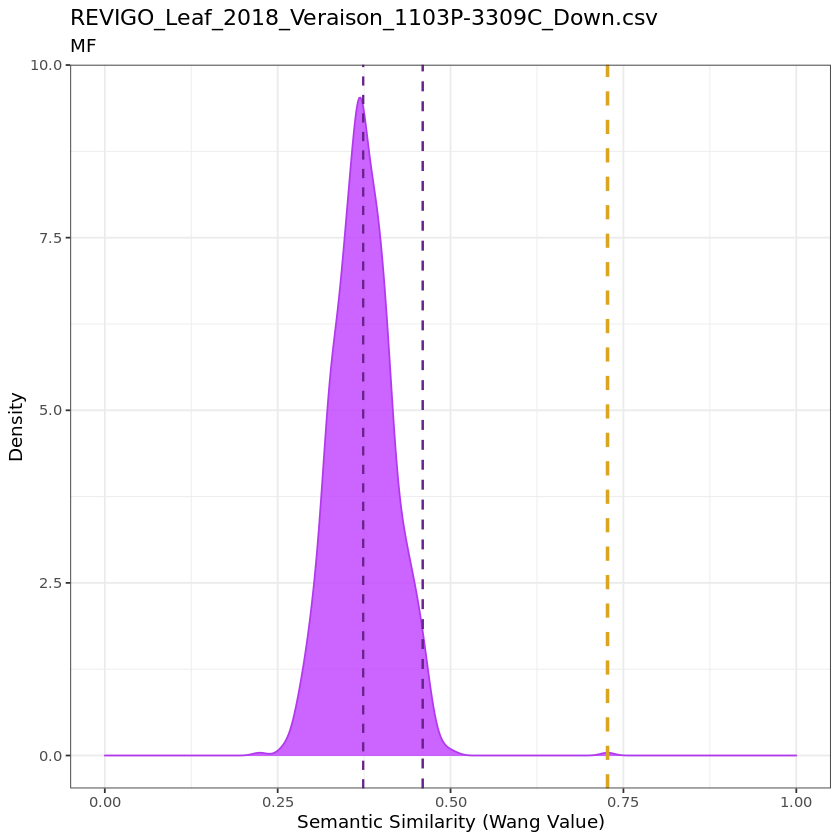

Warning message:
"Removed 4 rows containing non-finite values (stat_density)."

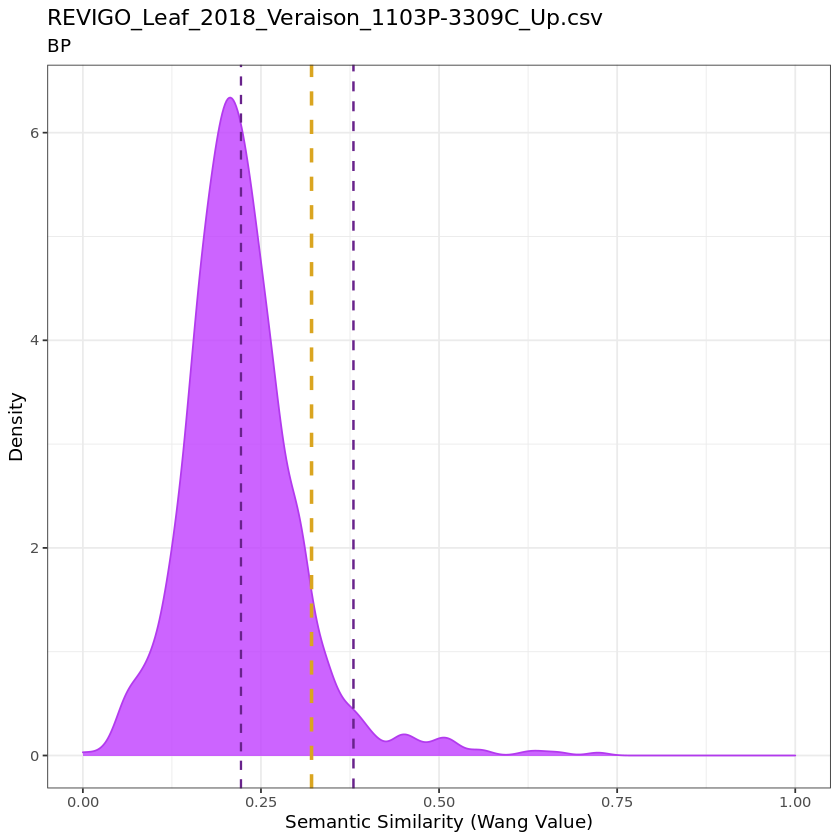

Warning message:
"Removed 38 rows containing non-finite values (stat_density)."

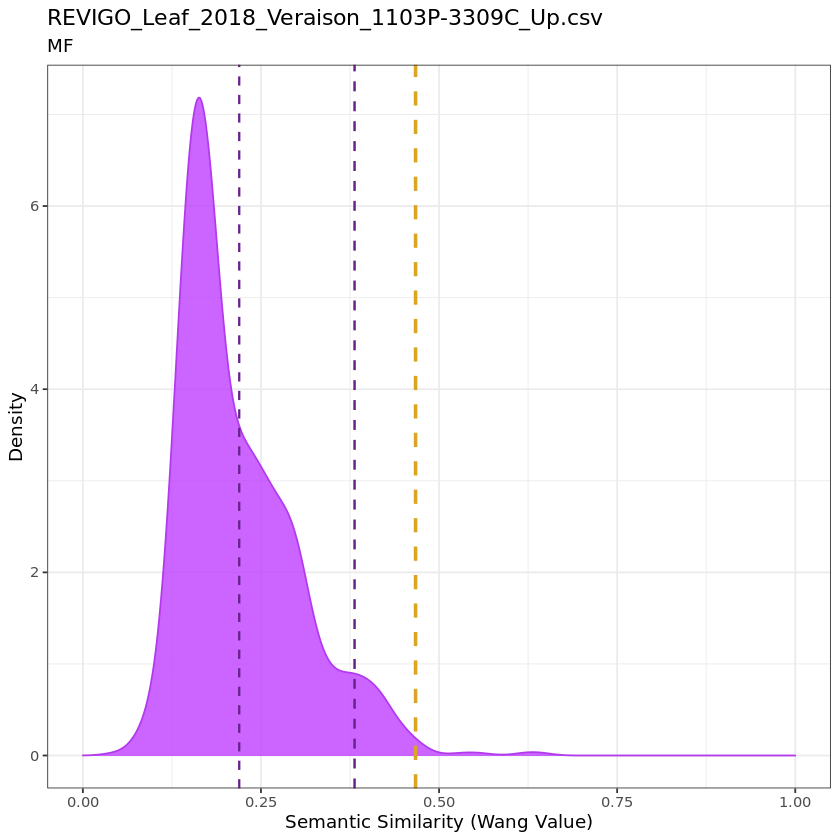

Warning message:
"Removed 415 rows containing non-finite values (stat_density)."

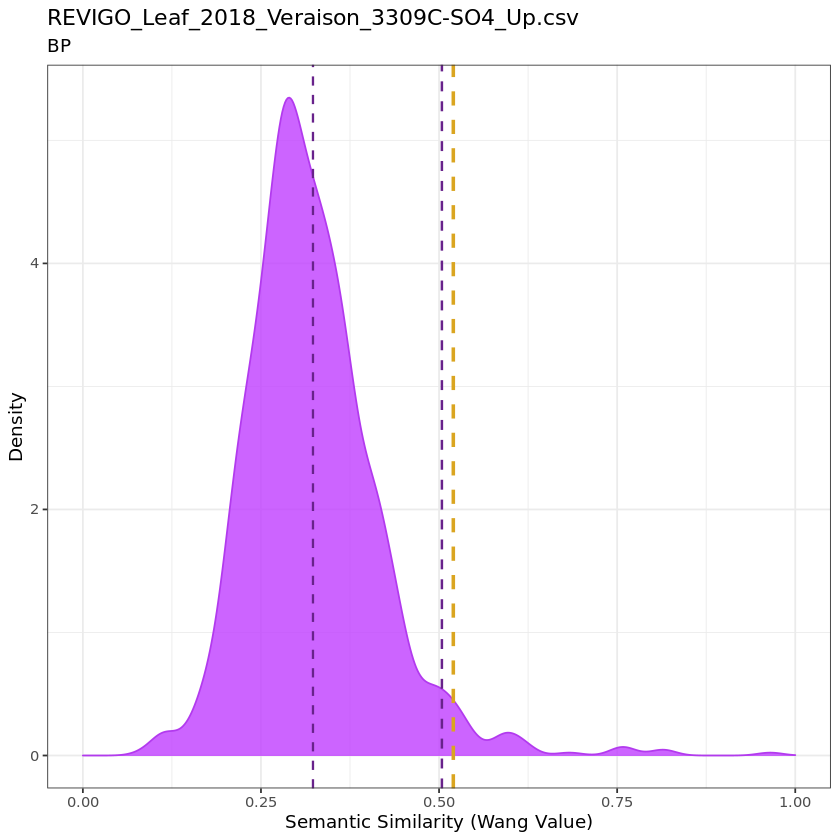

Warning message:
"Removed 10 rows containing non-finite values (stat_density)."

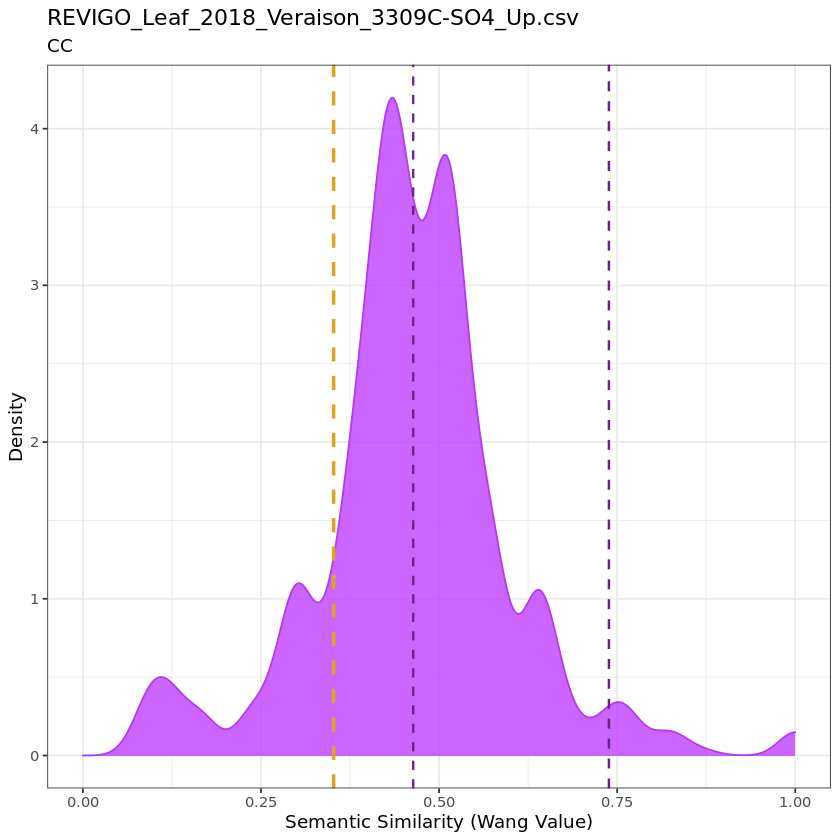

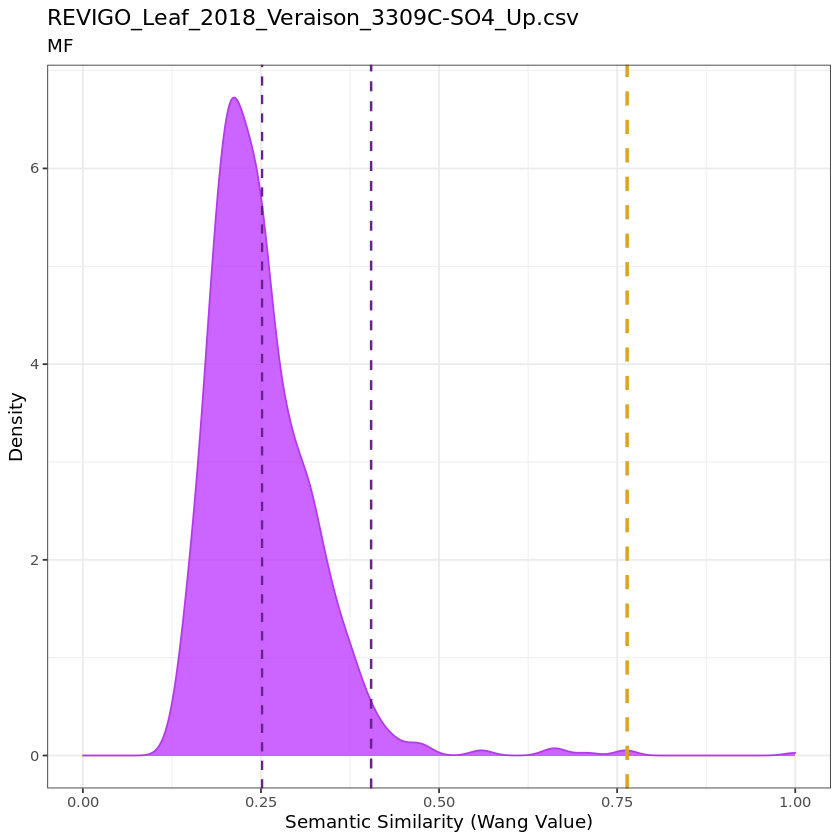

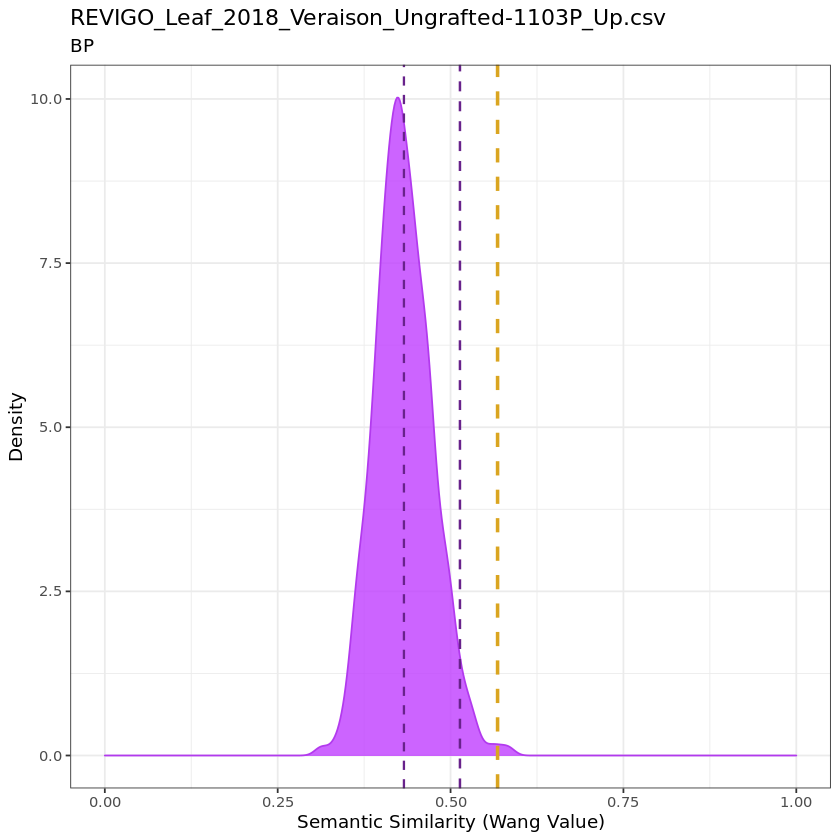

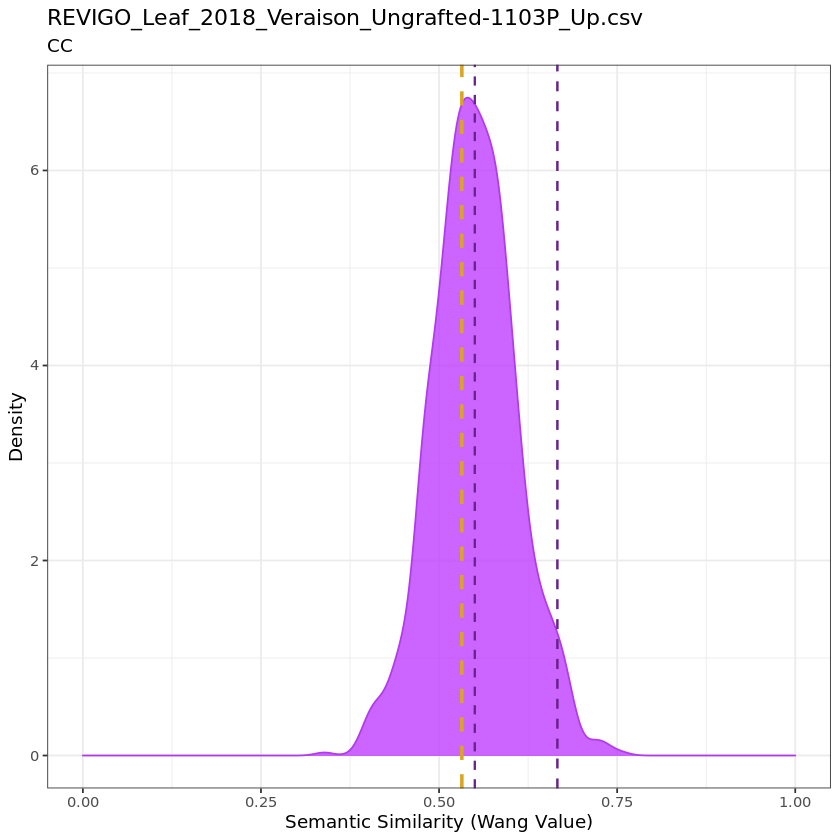

Warning message:
"Removed 10 rows containing non-finite values (stat_density)."

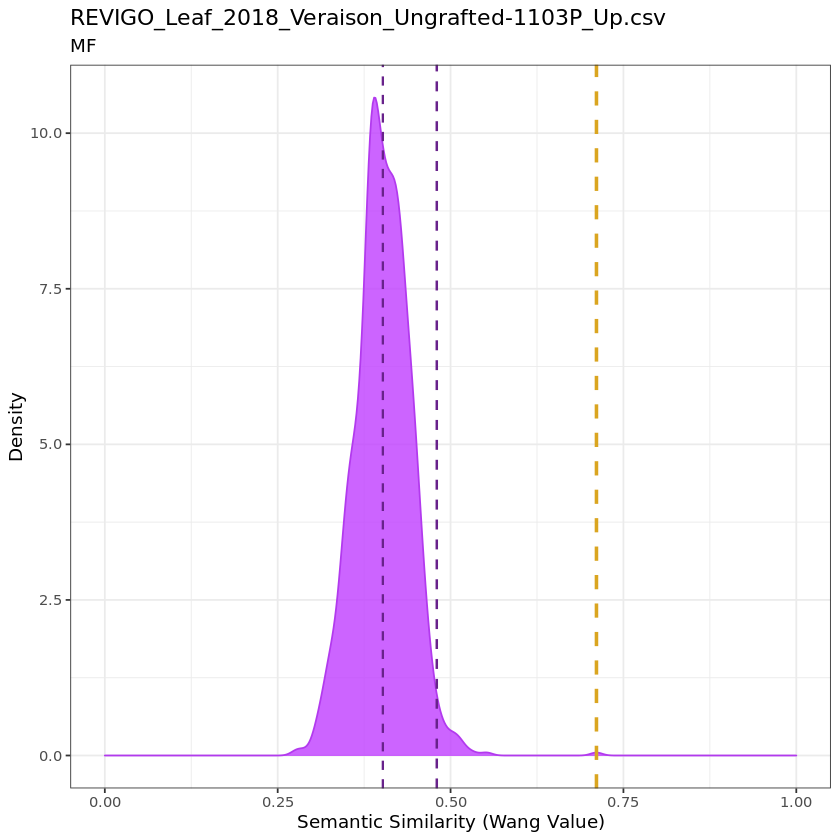

Warning message:
"Removed 23 rows containing non-finite values (stat_density)."

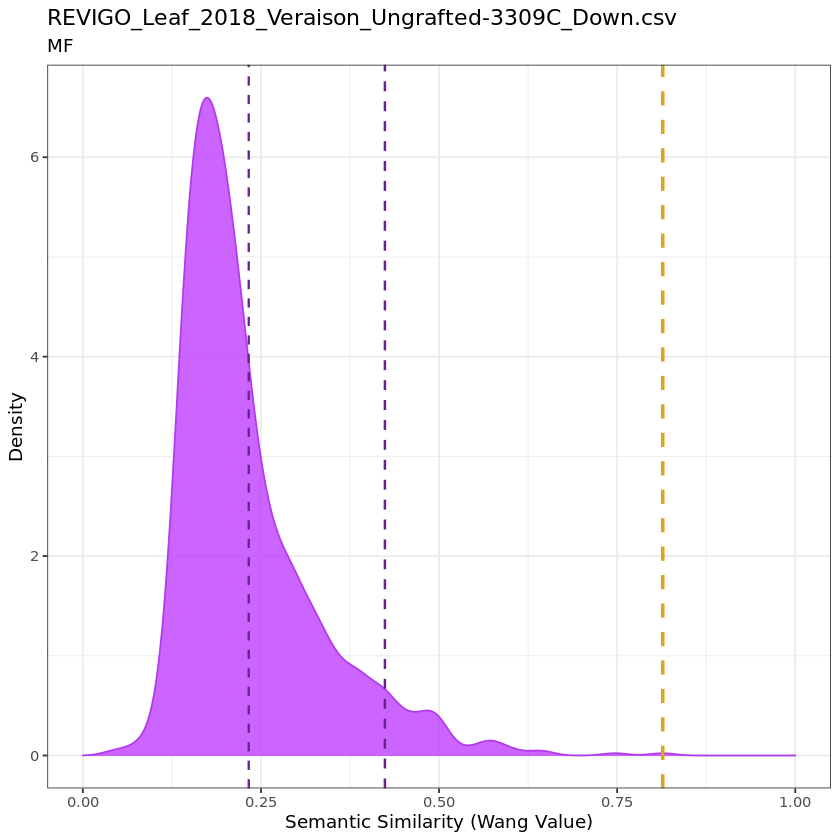

Warning message:
"Removed 344 rows containing non-finite values (stat_density)."

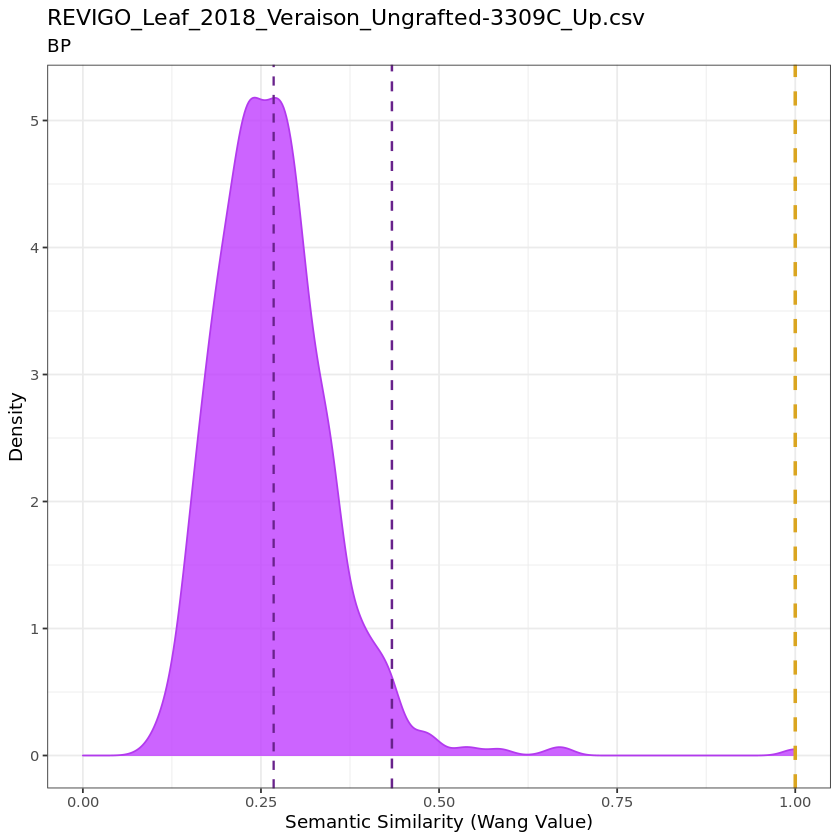

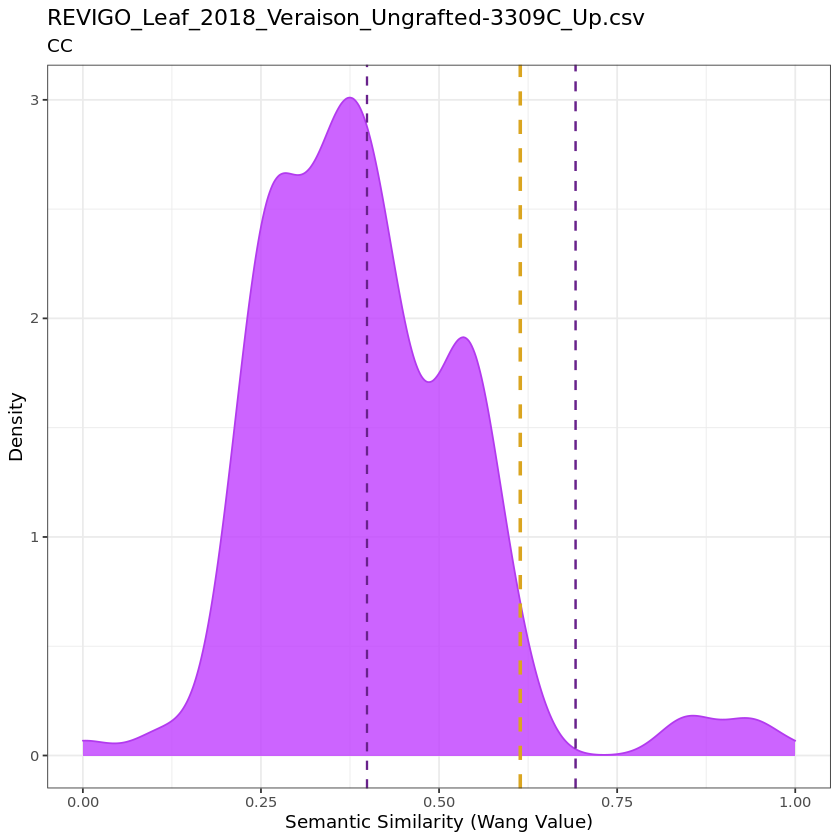

Warning message:
"Removed 142 rows containing non-finite values (stat_density)."

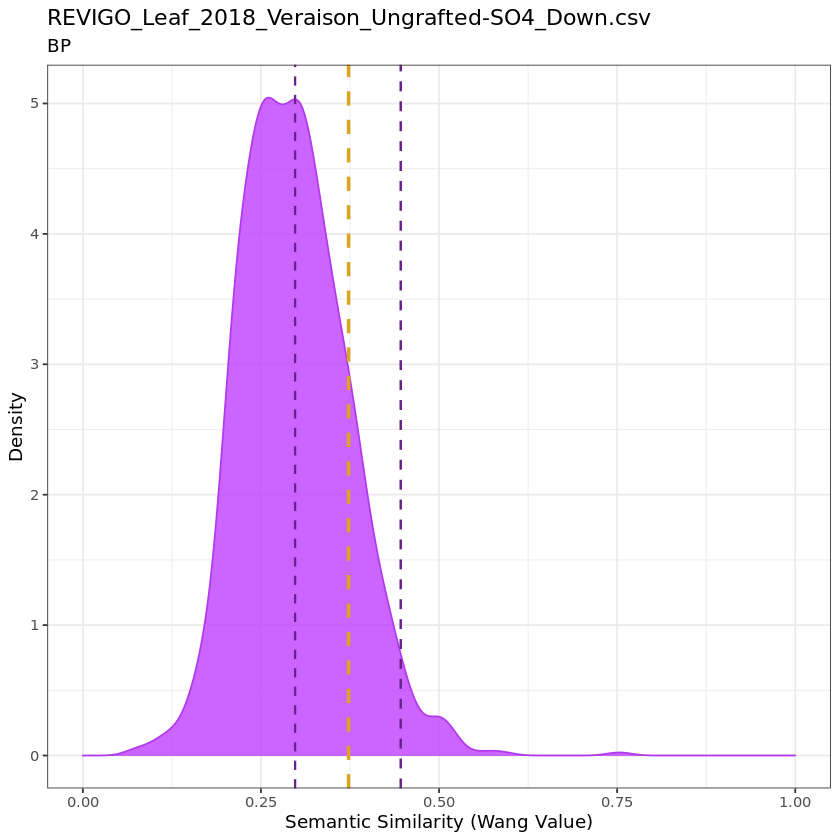

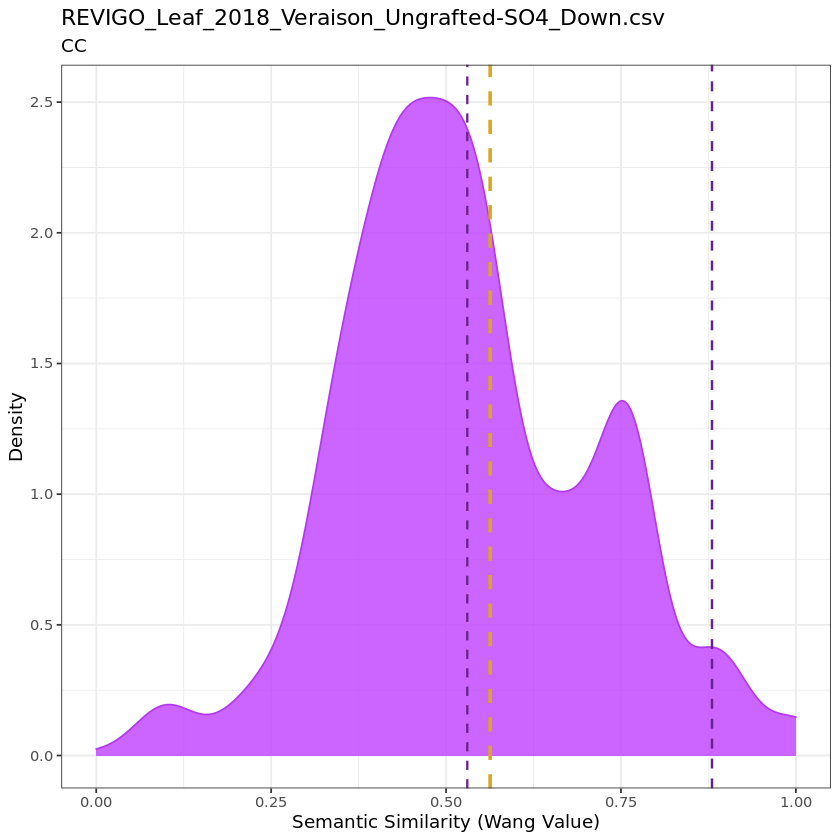

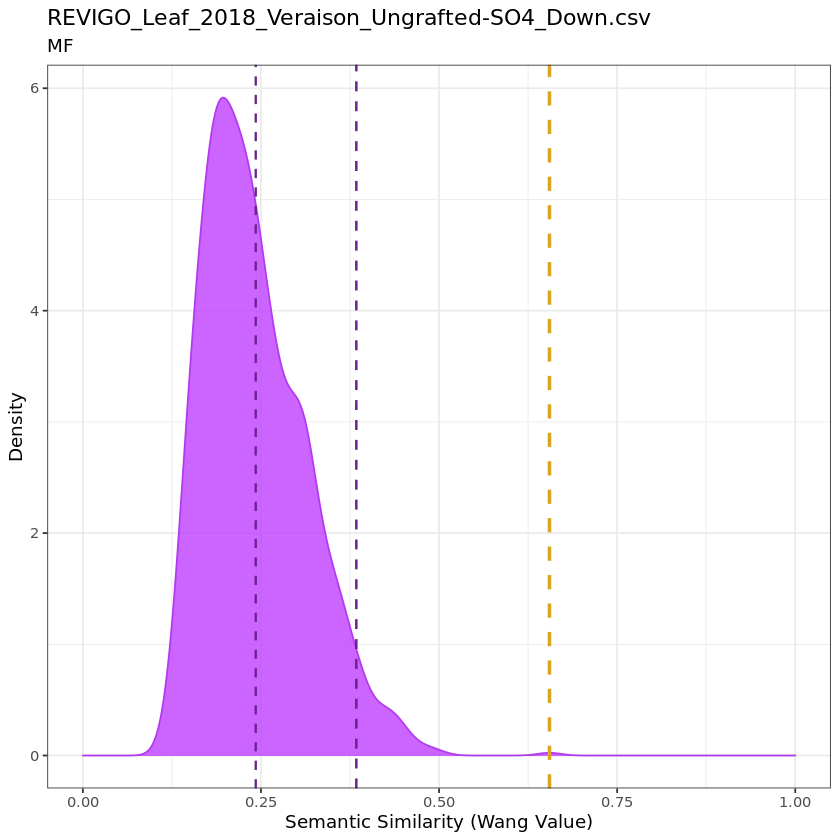

Warning message:
"Removed 31 rows containing non-finite values (stat_density)."

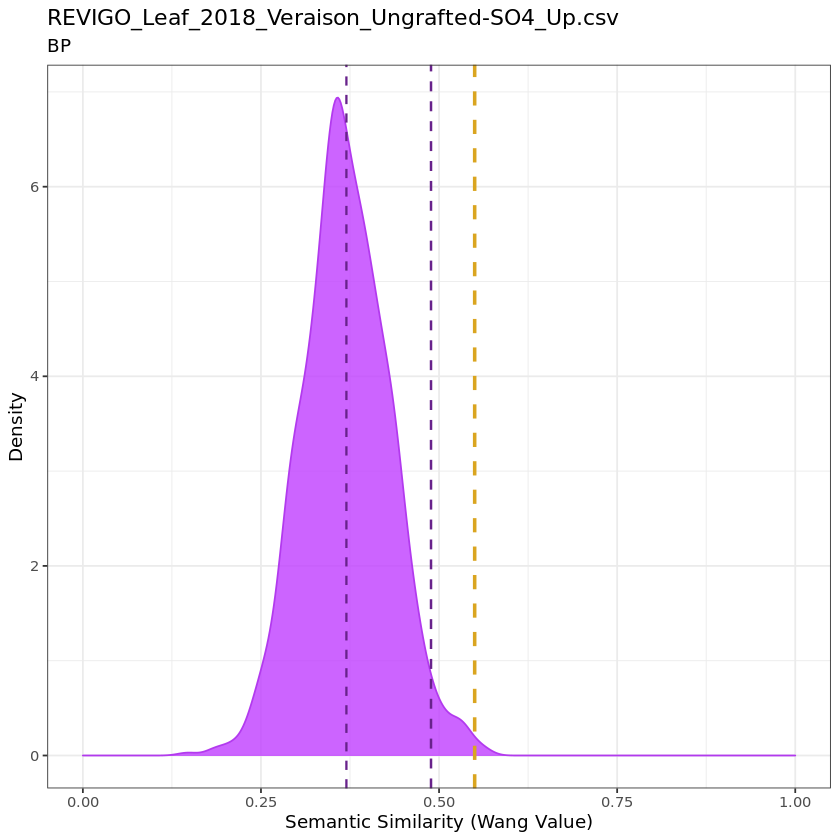

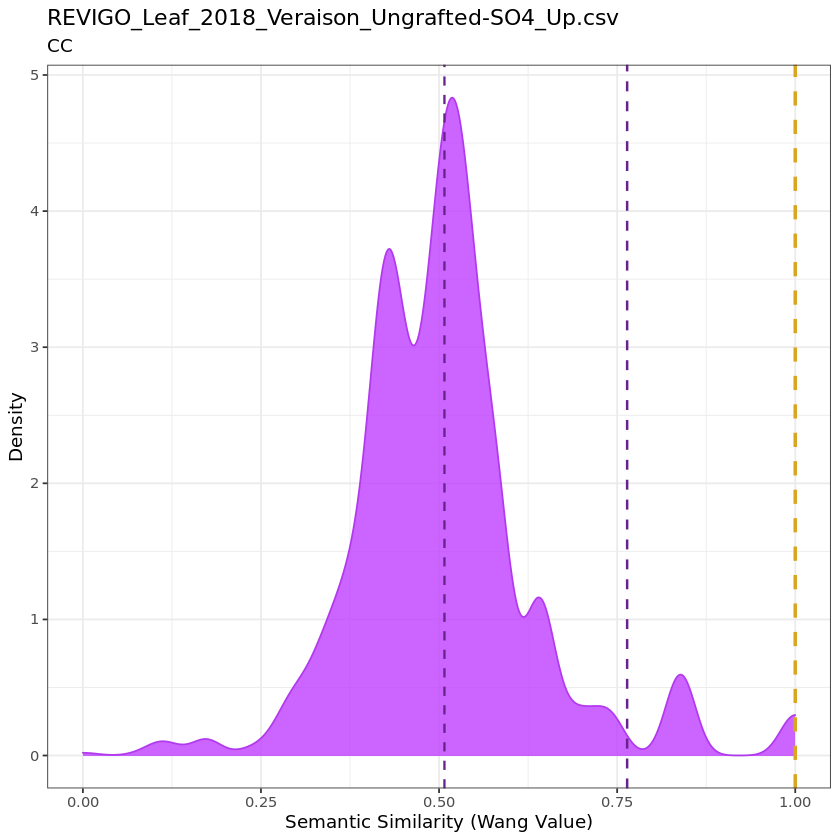

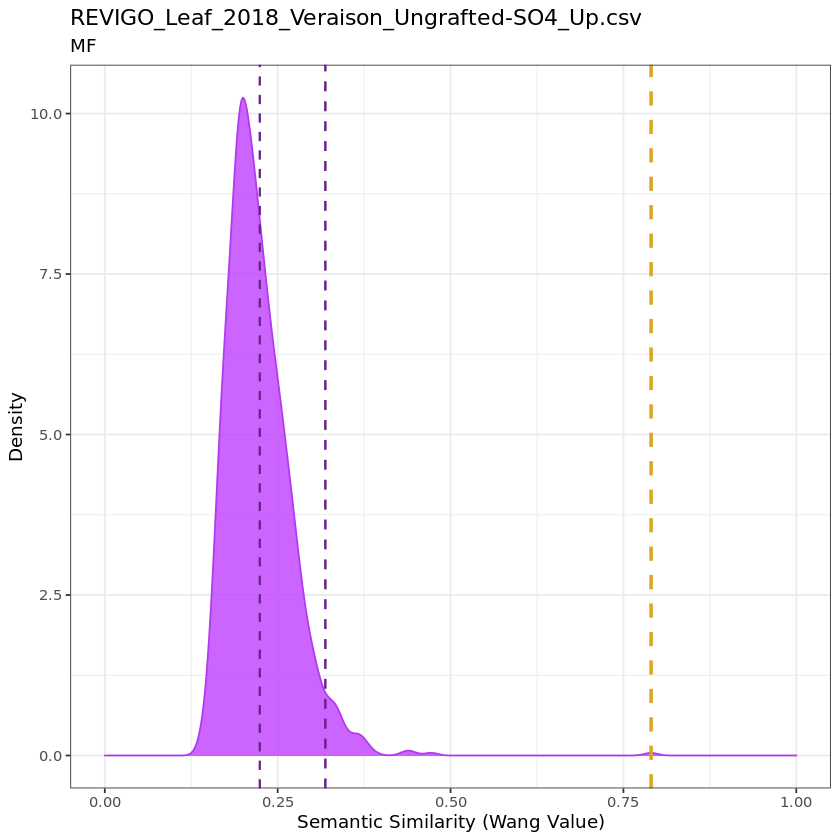

In [14]:
plots <- NULL
for (filename in unique(results[["name"]])) {
    for (ontology in c("BP", "CC", "MF")) {
        results.filtered <- results %>% 
            filter(name==filename) %>%
            filter(ont==ontology)
        
        original <- results.filtered[1,4]
        if (!is.na(original)) {        
            mu <- mean(results.filtered$semsim.Wang, na.rm=TRUE)
            s <- sd(results.filtered$semsim.Wang, na.rm=TRUE)

            p <- ggplot(results.filtered, aes(x=semsim.Wang)) + 
                xlim(0, 1) +
                geom_density(fill="darkorchid1", color="darkorchid2", alpha=0.8) + 
                geom_vline(aes(xintercept=original), color="goldenrod", linetype="dashed", size=1) +
                geom_vline(aes(xintercept=mu + 1.96*s), color="darkorchid4", linetype="dashed", size=0.7) +
                geom_vline(aes(xintercept=mu), color="darkorchid4", linetype="dashed", size=0.65) +
                theme_bw() +
                xlab("Semantic Similarity (Wang Value)") +
                ylab("Density") +
                ggtitle(filename, subtitle = ontology)
            
            print(p)
        }
        else {
            print(filename)
        }
    }
}

1. Figure out sizes of sets
2. x axis: size of set (that you build null over) AND THEN second size of other set
3. y axis: difference between true value and the mean of the null